In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Memory saving function credit to https://www.kaggle.com/gemartin/load-data-reduce-memory-usage
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

    for col in df.columns:
        col_type = df[col].dtype

        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))

    return df

In [ ]:
base_path = '/content/drive/MyDrive/Colab Notebooks/팀프로젝트/pubg-finish-placement-prediction/'
df_train = pd.read_csv(base_path + 'train_V2.csv')
df_test = pd.read_csv(base_path + 'test_V2.csv')

In [ ]:
base_path = '/content/drive/MyDrive/Colab Notebooks/팀프로젝트/pubg-finish-placement-prediction/'

df_train = reduce_mem_usage(pd.read_csv(base_path + "train_V2.csv"))
df_test = reduce_mem_usage(pd.read_csv(base_path + "test_V2.csv"))

Memory usage of dataframe is 983.90 MB
Memory usage after optimization is: 288.39 MB
Decreased by 70.7%
Memory usage of dataframe is 413.18 MB
Memory usage after optimization is: 121.74 MB
Decreased by 70.5%


In [ ]:
pd.set_option('display.max_columns', 30)
df_train.head(2)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.0,0,0,0,60,1241,0,0,0.0,1306,squad-fpp,28,26,-1,0,0.000000,0,0.000000,0,0,244.75,1,1466,0.444336
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.5,0,0,0,57,0,0,0,0.0,1777,squad-fpp,26,25,1484,0,0.004501,0,11.039062,0,0,1434.00,5,0,0.640137


In [ ]:
df_groupId = df_train.groupby('groupId')['killPoints', 'kills', 'killStreaks', 'longestKill', 'walkDistance', 'winPoints'].mean()

df_groupId['winPlacePerc'] = df_train.groupby('groupId')['winPlacePerc'].mean().values
df_groupId

,killPoints,kills,killStreaks,longestKill,walkDistance,winPoints,winPlacePerc
groupId,,,,,,,
00000c08b5be36,0.0,0.666667,0.666667,9.046875,271.5000,0.0,0.199951
00000d1cbbc340,0.0,1.000000,1.000000,1.963867,135.7500,0.0,0.115417
000025a09dd1d7,0.0,0.000000,0.000000,0.000000,110.8125,0.0,0.199951
000038ec4dff53,0.0,2.000000,1.000000,53.500000,2084.0000,0.0,0.961426
00003a54230763,1013.0,0.500000,0.500000,1.585938,92.6250,1501.0,0.139526
...,...,...,...,...,...,...,...
ffffedb6ecff6a,0.0,0.000000,0.000000,0.000000,156.1250,0.0,0.036987
fffff305a0133d,0.0,2.000000,1.500000,17.437500,2562.0000,0.0,0.851074
fffff32bc7eab9,1166.0,3.000000,2.000000,8.218750,114.6875,1443.0,0.250000


In [ ]:
df_groupId.corr().style.background_gradient(cmap='summer_r')

,killPoints,kills,killStreaks,longestKill,walkDistance,winPoints,winPlacePerc
killPoints,1.000000,0.156079,0.221519,0.104442,0.163951,0.992280,-0.044253
kills,0.156079,1.000000,0.844215,0.687837,0.504162,0.136638,0.427404
killStreaks,0.221519,0.844215,1.000000,0.625848,0.533006,0.200783,0.360741
longestKill,0.104442,0.687837,0.625848,1.000000,0.575002,0.090956,0.445443
walkDistance,0.163951,0.504162,0.533006,0.575002,1.000000,0.156731,0.626415
winPoints,0.992280,0.136638,0.200783,0.090956,0.156731,1.000000,-0.049936
winPlacePerc,-0.044253,0.427404,0.360741,0.445443,0.626415,-0.049936,1.000000


In [ ]:
df_groupId.index.nunique()

2026745

In [ ]:
df_train.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Id,7f96b2f878858a,eef90569b9d03c,1eaf90ac73de72,4616d365dd2853,315c96c26c9aac,ff79c12f326506,95959be0e21ca3,311b84c6ff4390,1a68204ccf9891,e5bb5a43587253,2b574d43972813,8de328a74658a9,ce4f6ac165705e,b7807186e3f679,8e244ac61b6aab,12d8d4bd94312c,62f2f0917d84b2,92022479b92ce7,7bd224781f064b,71cbdbc3b263e5
groupId,4d4b580de459be,684d5656442f9e,6a4a42c3245a74,a930a9c79cd721,de04010b3458dd,289a6836a88d27,2c485a1ad3d0f1,eaba5fcb7fc1ae,47cfbb04e1b1a2,759bb6f7514fd2,c549efede67ad3,f643df9df3877c,da24cdb91969cc,3c08e461874749,d40d0c7d3573a1,fe52d481bae68b,f61b698274d9f5,2f2c33f548c4b9,6dde607d151819,7b61f74b51906c
matchId,a10357fd1a4a91,aeb375fc57110c,110163d8bb94ae,f1f1f4ef412d7e,6dc8ff871e21e6,bac52627a12114,a8274e903927a2,292611730ca862,df014fbee741c6,3d3031c795305b,2dd6ddb8320fc1,80170383d90003,535b5dbd965a94,2c30ddf481c52d,94e1c1cc443c65,6fd9e765ddd0c5,1d6cfe0f6f23b0,07948d723b9c0f,733af30cc00099,a329ac99449ad7
assists,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
boosts,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,2,3,0,1
damageDealt,0.0,91.47,68.0,32.9,100.0,100.0,0.0,8.538,51.6,37.27,28.38,137.9,0.0,324.2,122.8,80.71,81.71,254.3,0.0,65.28
DBNOs,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,1,0,0,0
headshotKills,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
heals,0,0,0,0,0,0,0,0,0,0,0,0,0,5,2,0,14,12,0,1
killPlace,60,57,47,75,45,44,96,48,64,74,75,64,37,5,25,72,25,13,79,48


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4446965 entries, 0 to 4446965
Data columns (total 17 columns):
 #   Column           Dtype  
---  ------           -----  
 0   assists          int64  
 1   boosts           int64  
 2   damageDealt      float64
 3   DBNOs            int64  
 4   headshotKills    int64  
 5   heals            int64  
 6   kills            int64  
 7   killStreaks      int64  
 8   longestKill      float64
 9   matchType        int64  
 10  maxPlace         int64  
 11  revives          int64  
 12  rideDistance     float64
 13  swimDistance     float64
 14  walkDistance     float64
 15  weaponsAcquired  int64  
 16  winPlacePerc     float64
dtypes: float64(6), int64(11)
memory usage: 610.7 MB


In [ ]:
df_train.describe(include = np.number).drop('count').T

,mean,std,min,25%,50%,75%,max
assists,0.233815,0.588573,0.0,0.0,0.0000,0.000000,22.0
boosts,1.106908,1.715794,0.0,0.0,0.0000,2.000000,33.0
damageDealt,130.717138,170.780621,0.0,0.0,84.2400,186.000000,6616.0
DBNOs,0.657876,1.145743,0.0,0.0,0.0000,1.000000,53.0
headshotKills,0.226820,0.602155,0.0,0.0,0.0000,0.000000,64.0
heals,1.370147,2.679982,0.0,0.0,0.0000,2.000000,80.0
killPlace,47.599350,27.462937,1.0,24.0,47.0000,71.000000,101.0
killPoints,505.006042,627.504896,0.0,0.0,0.0000,1172.000000,2170.0
kills,0.924783,1.558445,0.0,0.0,0.0000,1.000000,72.0
killStreaks,0.543955,0.710972,0.0,0.0,0.0000,1.000000,20.0


In [ ]:
df_train.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

지울만한 컬럼이랑
연관성이 많은 컬럼 추출


In [ ]:
df_train['winPlacePerc'][df_train['winPlacePerc'].isnull()]
df_train.dropna(subset=['winPlacePerc'], inplace = True)
# 결측치 제거

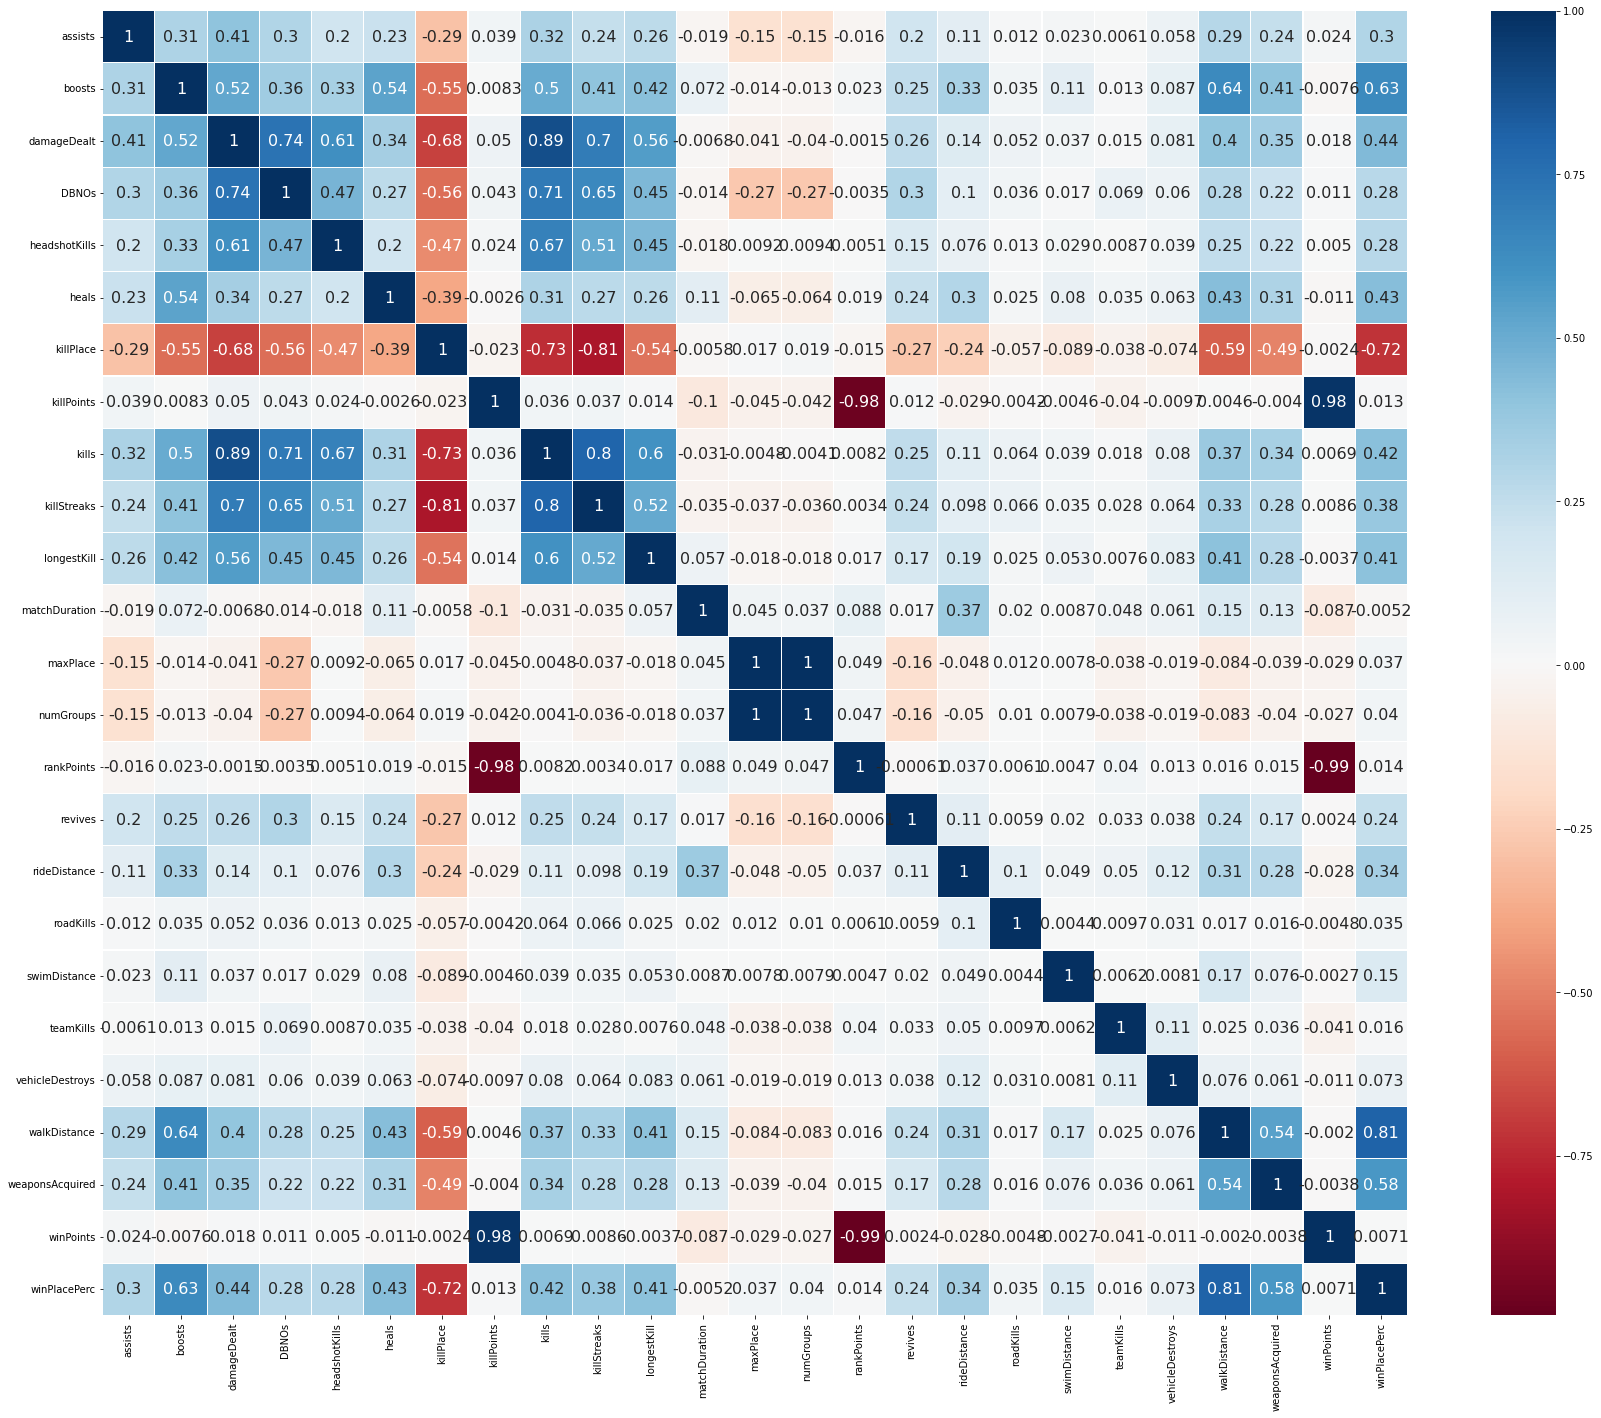

In [ ]:
f,ax = plt.subplots(figsize=(30, 24))
colormap = plt.cm.RdBu
sns.heatmap(df_train.corr(), linewidths=0.1, vmax=1.0,
           square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size": 16})
plt.show()

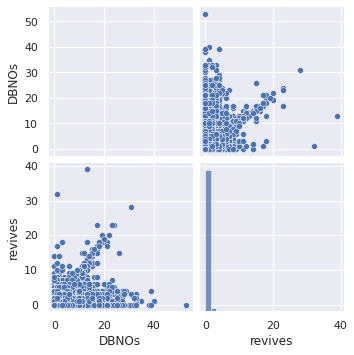

In [ ]:
sns.set()
cols = ['DBNOs', 'revives']
sns.pairplot(df_train[cols], size=2.5)
plt.show()

# kill 과 winplaceperc의 상관관계

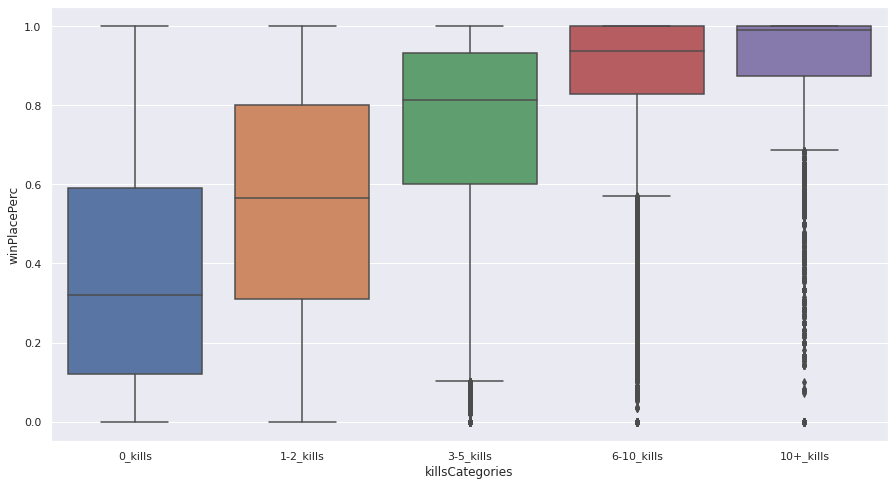

In [ ]:
kills = df_train.copy()
kills['killsCategories'] = pd.cut(kills['kills'], [-1, 0, 2, 5, 10, 60], labels = ['0_kills','1-2_kills', '3-5_kills', '6-10_kills', '10+_kills'])

plt.figure(figsize=(15,8))
sns.boxplot(x="killsCategories", y="winPlacePerc", data=kills)
plt.show()

In [ ]:
kills

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,killsCategories
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0.0000,0,0.000,0,0,244.80,1,1466,0.4444,0_kills
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0.0045,0,11.040,0,0,1434.00,5,0,0.6400,0_kills
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0.0000,0,0.000,0,0,161.80,2,0,0.7755,0_kills
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0.0000,0,0.000,0,0,202.70,3,0,0.1667,0_kills
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0.0000,0,0.000,0,0,49.75,2,0,0.1875,1-2_kills
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.00,0,0,0,74,...,1292.0000,0,0.000,0,0,1019.00,3,1507,0.1786,0_kills
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.15,0,0,0,69,...,0.0000,0,0.000,0,0,81.70,6,0,0.2935,0_kills
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06,0,0,0,66,...,0.0000,0,2.184,0,0,788.70,4,0,0.4815,0_kills
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,4,180.40,1,1,2,11,...,0.0000,0,0.000,0,0,2748.00,8,0,0.8000,1-2_kills


#matchtype 종류 및 개수 확인

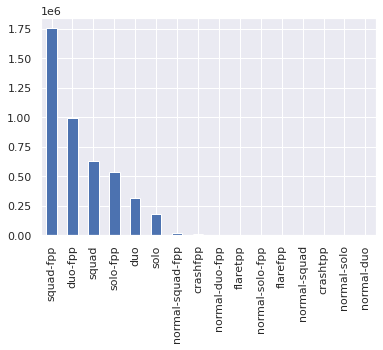

In [ ]:
df_train['matchType'].value_counts().plot.bar()
plt.show()

# duration과 winplaceperc 비교

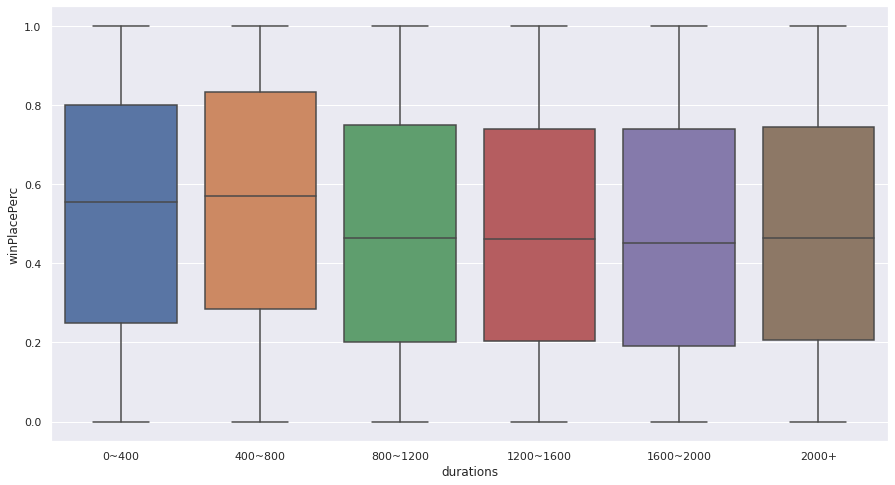

In [ ]:
duration = df_train.copy()
duration['durations'] = pd.cut(duration['matchDuration'], [-1, 400, 800, 1200, 1600, 2000, 2400], labels = ['0~400','400~800', '800~1200', '1200~1600', '1600~2000', '2000+'])

plt.figure(figsize=(15,8))
sns.boxplot(x="durations", y="winPlacePerc", data=duration)
plt.show()

#killPlace와 winplaceperc

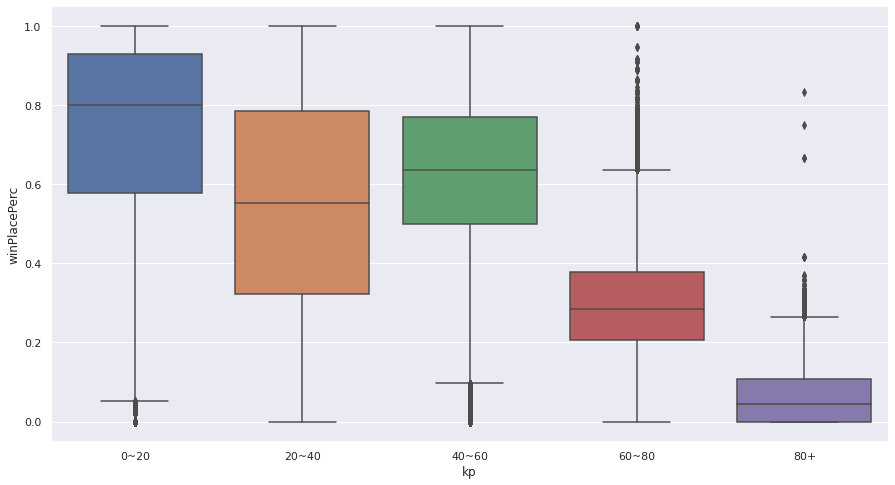

In [ ]:
killp = df_train.copy()
killp['kp'] = pd.cut(killp['killPlace'], [-1, 20, 40, 60, 80, 101], labels = ['0~20','20~40', '40~60', '60~80', '80+'])

plt.figure(figsize=(15,8))
sns.boxplot(x="kp", y="winPlacePerc", data=killp)
plt.show()

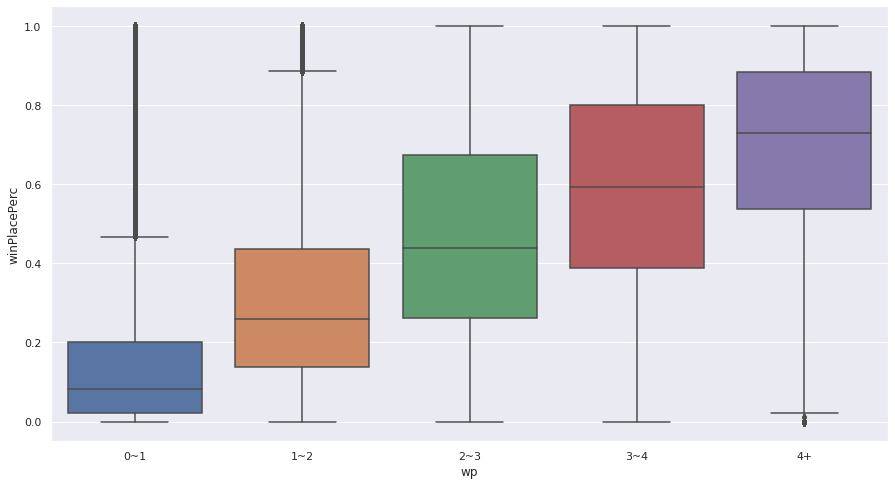

In [ ]:
weapon = df_train.copy()
weapon['wp'] = pd.cut(weapon['weaponsAcquired'], [-1, 1, 2, 3, 4, 100], labels = ['0~1','1~2', '2~3', '3~4', '4+'])

plt.figure(figsize=(15,8))
sns.boxplot(x="wp", y="winPlacePerc", data=weapon)
plt.show()

#그룹 통일하기

In [ ]:
df_train.loc[(df_train['matchType']=='squad-fpp') | (df_train['matchType']=='squad'), 'matchType'] = 'squad'
df_train.loc[(df_train['matchType']=='duo-fpp') , 'matchType'] = 'duo'
df_train.loc[(df_train['matchType']=='solo-fpp') , 'matchType'] = 'solo'
df_train.loc[(df_train['matchType']=='crashfpp') | (df_train['matchType']=='flarefpp') | (df_train['matchType']=='crashtpp') | (df_train['matchType']=='flaretpp')  | (df_train['matchType']=='normal-squad-fpp') | (df_train['matchType']=='normal-squad')| (df_train['matchType']=='normal-duo-fpp') | (df_train['matchType']=='normal-duo')| (df_train['matchType']=='normal-solo-fpp') | (df_train['matchType']=='normal-solo'), 'matchType'] = 'eventmatch'

df_test.loc[(df_test['matchType']=='squad-fpp') | (df_test['matchType']=='squad') , 'matchType'] = 'squad'
df_test.loc[(df_test['matchType']=='duo-fpp'), 'matchType'] = 'duo'
df_test.loc[(df_test['matchType']=='solo-fpp'), 'matchType'] = 'solo'
df_test.loc[(df_test['matchType']=='crashfpp') | (df_test['matchType']=='flarefpp') | (df_test['matchType']=='crashtpp') | (df_test['matchType']=='flaretpp')| (df_test['matchType']=='normal-squad-fpp') | (df_test['matchType']=='normal-squad') | (df_test['matchType']=='normal-duo-fpp') | (df_test['matchType']=='normal-duo') | (df_test['matchType']=='normal-solo-fpp') | (df_test['matchType']=='normal-solo'), 'matchType'] = 'eventmatch'

# 같은 그룹끼리 묶어보기


In [ ]:
df_train_group = df_train.copy()
df_test_group = df_test.copy()

In [ ]:
df_train_group['group_size']=df_train_group['groupId'].map(lambda x: pd.concat([df_train_group['groupId'],df_test_group['groupId']]).value_counts()[x])
df_test_group['group_size']=df_test_group['groupId'].map(lambda x: pd.concat([df_train_group['groupId'],df_test_group['groupId']]).value_counts()[x])

KeyboardInterrupt: ignored

# matchType == solo

In [ ]:
# 첫 회의때 solo data만 가지고 EDA를 진행하자는 의견이 나옴
# matchtype 한번에 EDA를 하는 방향을로 수정

In [ ]:
df_train_solo = df_train[df_train['matchType']=='solo'] # matchType == solo 인 데이터만 추출
df_test_solo = df_test[df_test['matchType']=='solo'] # matchType == solo 인 데이터만 추출

In [ ]:
train.drop(['Id', 'groupId', 'matchId', 'killPlace', 'killPoints', 'matchDuration', 'numGroups', 'rankPoints',  'roadKills', 'teamKills', 'winPoints', 'matchDuration'], axis = 1, inplace = True)
test.drop(['Id', 'groupId', 'matchId', 'killPlace', 'killPoints', 'matchDuration','numGroups', 'rankPoints',  'roadKills', 'teamKills', 'winPoints', 'matchDuration'], axis = 1, inplace = True)
# 회의를 통한 컬럼 통일

In [ ]:
df_train_solo['heals and boosts'] = df_train_solo['heals'] + df_train_solo['boosts']
df_test_solo['heals and boosts'] = df_train_solo['heals'] + df_train_solo['boosts']
# heals와 boosts 컬럼 합침

In [ ]:
df_train_solo.drop(['heals', 'boosts'], axis = 1, inplace = True )
df_test_solo.drop(['heals', 'boosts'], axis = 1, inplace = True )
# heals, boosts 컬럼 드랍

In [ ]:
df_train_solo

,damageDealt,headshotKills,killPlace,kills,killStreaks,longestKill,rideDistance,walkDistance,weaponsAcquired,winPlacePerc,heals and boosts
4,100.000,0,45,1,1,58.53,0.0,49.75,2,0.1875,0
7,8.538,0,48,0,0,0.00,2004.0,1089.00,6,0.7368,0
13,324.200,1,5,4,1,49.83,1228.0,2050.00,6,0.8750,6
17,254.300,0,13,2,1,36.00,2367.0,1787.00,3,0.8211,15
35,136.900,0,37,1,1,22.83,0.0,270.70,1,0.3474,0
...,...,...,...,...,...,...,...,...,...,...,...
4446950,203.500,0,32,1,1,11.27,0.0,1559.00,5,0.5000,0
4446954,30.100,0,58,0,0,0.00,0.0,2146.00,6,0.5306,0
4446959,22.680,0,89,0,0,0.00,0.0,40.25,1,0.0842,0
4446962,44.150,0,69,0,0,0.00,0.0,81.70,6,0.2935,1


In [ ]:
df_train_solo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 718704 entries, 4 to 4446965
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   damageDealt       718704 non-null  float64
 1   headshotKills     718704 non-null  int64  
 2   killPlace         718704 non-null  int64  
 3   kills             718704 non-null  int64  
 4   killStreaks       718704 non-null  int64  
 5   longestKill       718704 non-null  float64
 6   rideDistance      718704 non-null  float64
 7   walkDistance      718704 non-null  float64
 8   weaponsAcquired   718704 non-null  int64  
 9   winPlacePerc      718704 non-null  float64
 10  heals and boosts  718704 non-null  int64  
dtypes: float64(5), int64(6)
memory usage: 81.9 MB


In [ ]:
df_train_solo.describe()

,damageDealt,headshotKills,killPlace,kills,killStreaks,longestKill,rideDistance,walkDistance,weaponsAcquired,winPlacePerc,heals and boosts
count,718704.000000,718704.000000,718704.000000,718704.000000,718704.000000,718704.000000,718704.000000,718704.000000,718704.000000,718704.000000,718704.000000
mean,117.323002,0.244533,47.556407,0.918580,0.472445,21.447532,463.402273,955.662909,3.555088,0.487273,2.071068
std,158.590943,0.634064,27.699179,1.497003,0.559173,46.404728,1374.521746,1070.112147,2.388014,0.298412,3.652976
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,23.000000,0.000000,0.000000,0.000000,0.000000,100.500000,2.000000,0.229200,0.000000
50%,73.960000,0.000000,47.000000,0.000000,0.000000,0.000000,0.000000,502.700000,3.000000,0.483900,0.000000
75%,168.600000,0.000000,71.000000,1.000000,1.000000,20.690000,0.000000,1588.000000,5.000000,0.747400,3.000000
max,2490.000000,19.000000,100.000000,23.000000,18.000000,1001.000000,40710.000000,25780.000000,153.000000,1.000000,69.000000


In [ ]:
sns.set()
cols = ['winPlacePerc', 'damageDealt', 'heals','boosts', 'weaponsAcquired', 'kills','longestKill', 'walkDistance', 'rideDistance', 'swimDistance']
sns.pairplot(df_train[cols], size=2.5)
plt.show()

- ride, walk 합치는 것도 괜찮아보임
- kill, damagedealt의 상관관계가 높아보임

## damageDealt

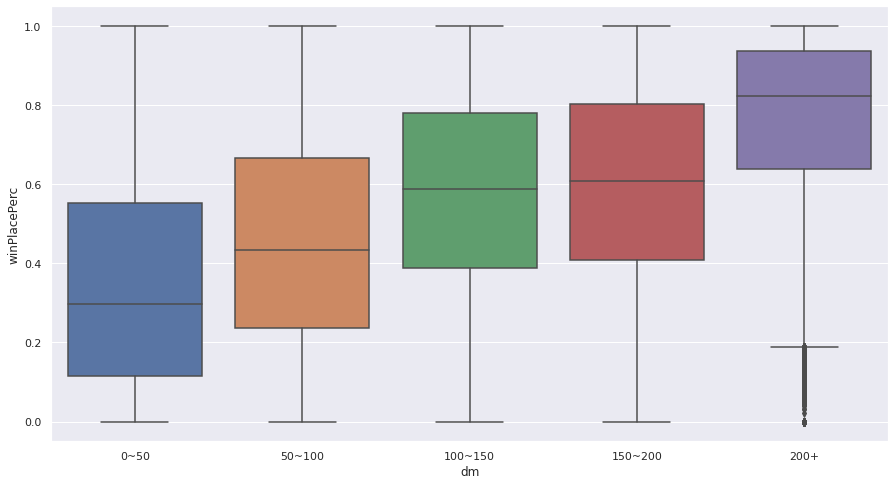

In [ ]:
damage = df_train_solo.copy() 
damage['dm'] = pd.cut(damage['damageDealt'], [-1, 50, 100, 150, 200, 6700], labels = ['0~50','50~100', '100~150', '150~200', '200+'])

plt.figure(figsize=(15,8))
sns.boxplot(x="dm", y="winPlacePerc", data=damage)
plt.show()
# damage 와 winplaceperc의 상관관계

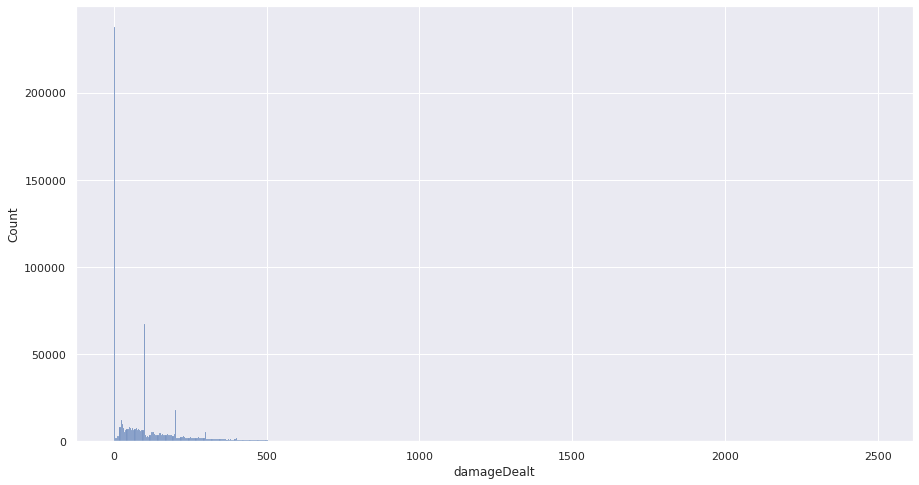

In [ ]:
plt.figure(figsize=(15,8))
sns.histplot(df_train_solo['damageDealt'])
plt.show()

## heals and boosts

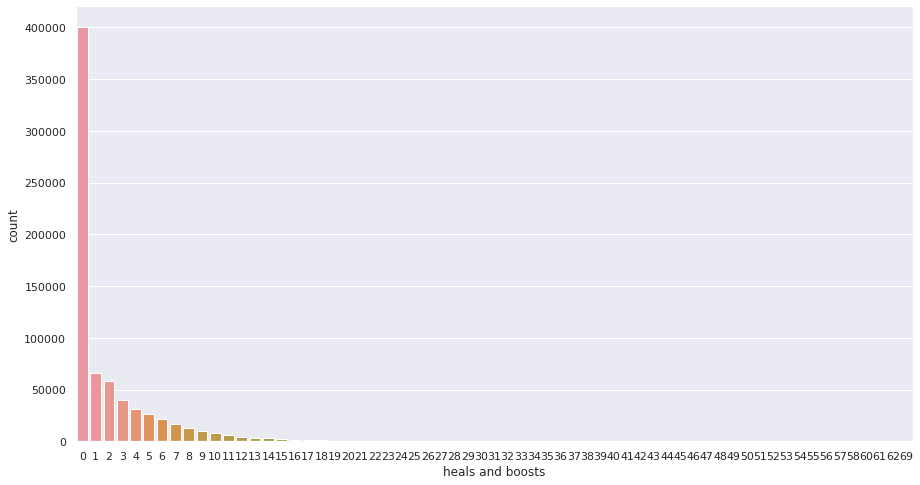

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(df_train_solo['heals and boosts'])
plt.show()

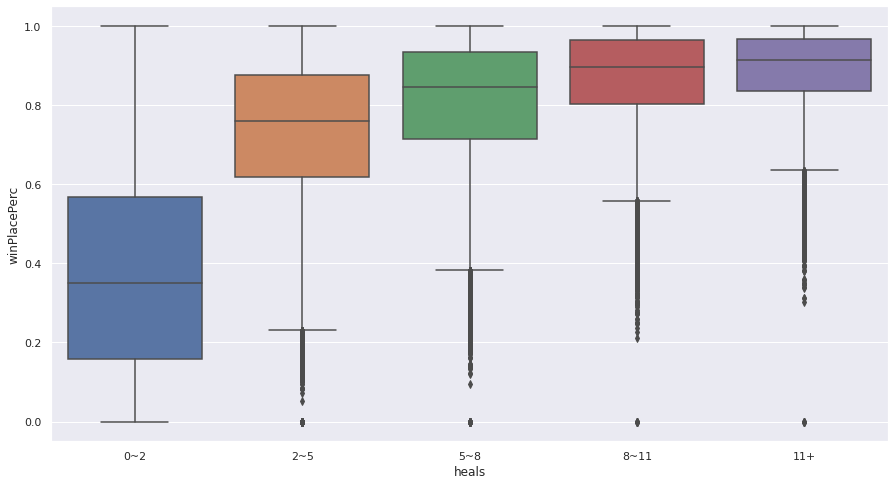

In [ ]:
heal = df_train_solo.copy() 
heal['heals'] = pd.cut(heal['heals and boosts'], [-1, 2, 5, 8, 11, 70], labels = ['0~2','2~5', '5~8', '8~11', '11+'])

plt.figure(figsize=(15,8))
sns.boxplot(x="heals", y="winPlacePerc", data=heal)
plt.show()
# heals and boosts 와 winplaceperc의 상관관계

## headshotkills

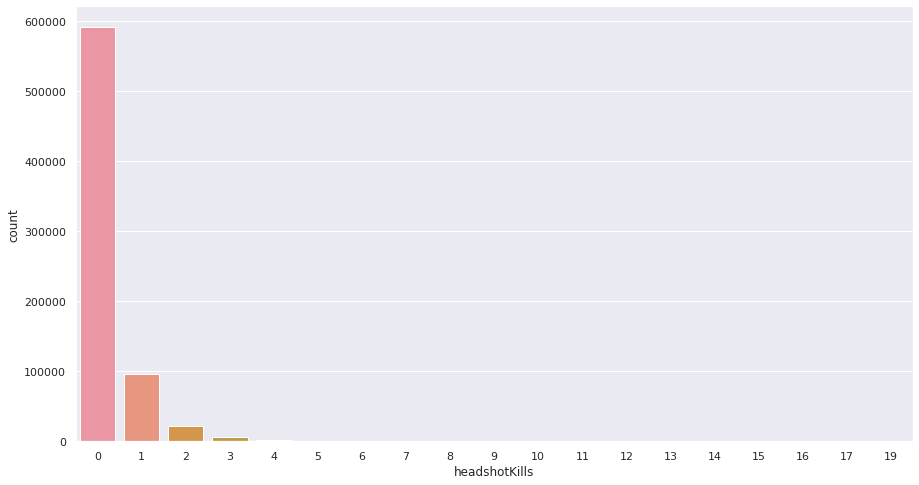

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(df_train_solo['headshotKills'])
plt.show()

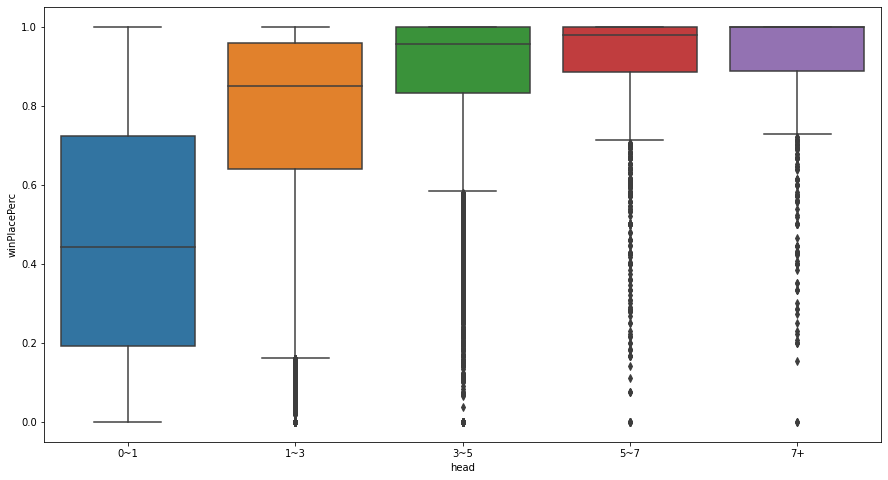

In [ ]:
headshot = df_train.copy()
headshot['head'] = pd.cut(headshot['headshotKills'], [-1,1,3,5,7,19], labels = ['0~1', '1~3', '3~5', '5~7', '7+'])
plt.figure(figsize = (15,8))
sns.boxplot(x= 'head', y= 'winPlacePerc', data = headshot)

In [ ]:
headshot

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,head
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,1241,0,0,0.00,1306,squad,28,26,-1,0,0.0000,0,0.000,0,0,244.80,1,1466,0.4444,0~1
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,0,0,0,0.00,1777,squad,26,25,1484,0,0.0045,0,11.040,0,0,1434.00,5,0,0.6400,0~1
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,0,0,0,0.00,1318,duo,50,47,1491,0,0.0000,0,0.000,0,0,161.80,2,0,0.7755,0~1
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,0,0,0,0.00,1436,squad,31,30,1408,0,0.0000,0,0.000,0,0,202.70,3,0,0.1667,0~1
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,0,1,1,58.53,1424,solo,97,95,1560,0,0.0000,0,0.000,0,0,49.75,2,0,0.1875,0~1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.00,0,0,0,74,1029,0,0,0.00,1873,squad,29,28,-1,0,1292.0000,0,0.000,0,0,1019.00,3,1507,0.1786,0~1
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.15,0,0,0,69,0,0,0,0.00,1435,solo,93,93,1501,0,0.0000,0,0.000,0,0,81.70,6,0,0.2935,0~1
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06,0,0,0,66,0,0,0,0.00,1321,squad,28,28,1500,0,0.0000,0,2.184,0,0,788.70,4,0,0.4815,0~1
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,4,180.40,1,1,2,11,0,2,1,98.50,1373,squad,26,25,1418,2,0.0000,0,0.000,0,0,2748.00,8,0,0.8000,0~1


## killPlace

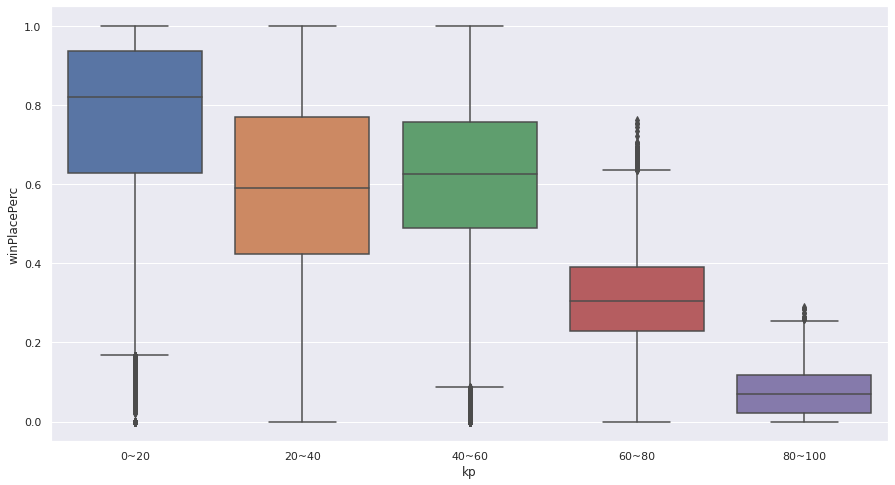

In [ ]:
killplace = df_train_solo.copy()
killplace['kp'] = pd.cut(killplace['killPlace'], [-1, 20 , 40, 60 ,80 ,100], labels = ['0~20', '20~40', '40~60', '60~80', '80~100'])
plt.figure(figsize=(15,8))
sns.boxplot(x='kp', y='winPlacePerc', data = killplace)

##kills

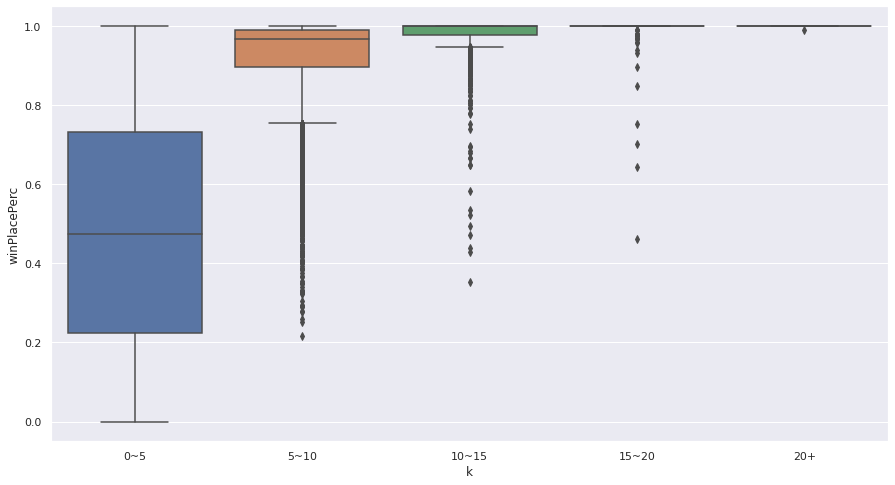

In [ ]:
kill = df_train_solo.copy()
kill['k'] = pd.cut(kill['kills'], [-1, 5, 10, 15 ,20 ,25], labels = ['0~5', '5~10', '10~15', '15~20', '20+'])
plt.figure(figsize=(15,8))
sns.boxplot(x='k', y='winPlacePerc', data = kill)

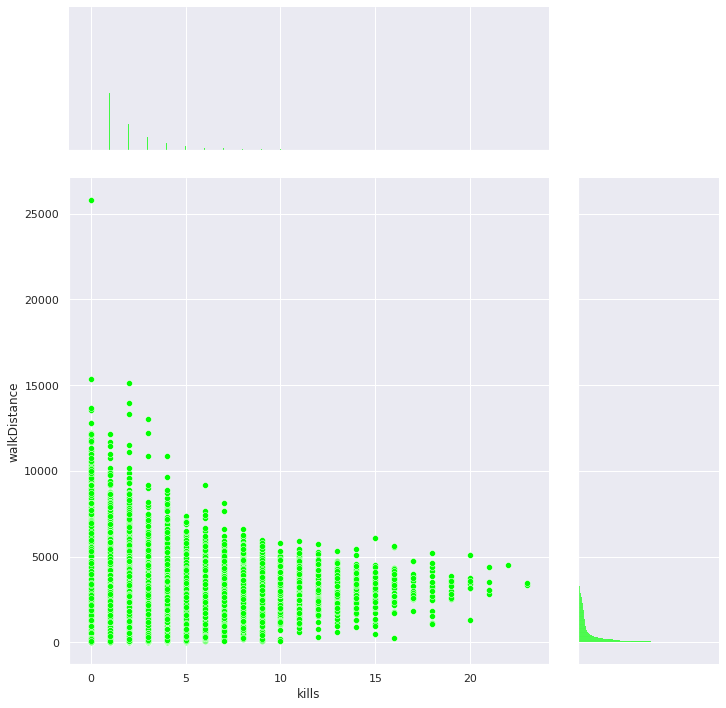

In [ ]:
sns.jointplot(x="kills", y="walkDistance", data=df_train_solo, height=10, ratio=3, color="lime")
plt.show()

##killStreaks

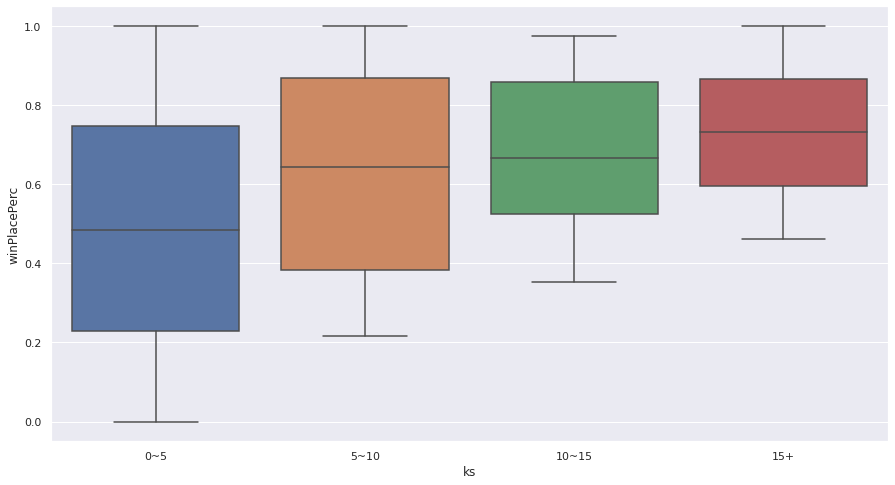

In [ ]:
killstreaks = df_train_solo.copy()
killstreaks['ks'] = pd.cut(killstreaks['killStreaks'], [-1, 5, 10, 15 ,20], labels = ['0~5', '5~10', '10~15', '15+'])
plt.figure(figsize=(15,8))
sns.boxplot(x='ks', y='winPlacePerc', data = killstreaks)

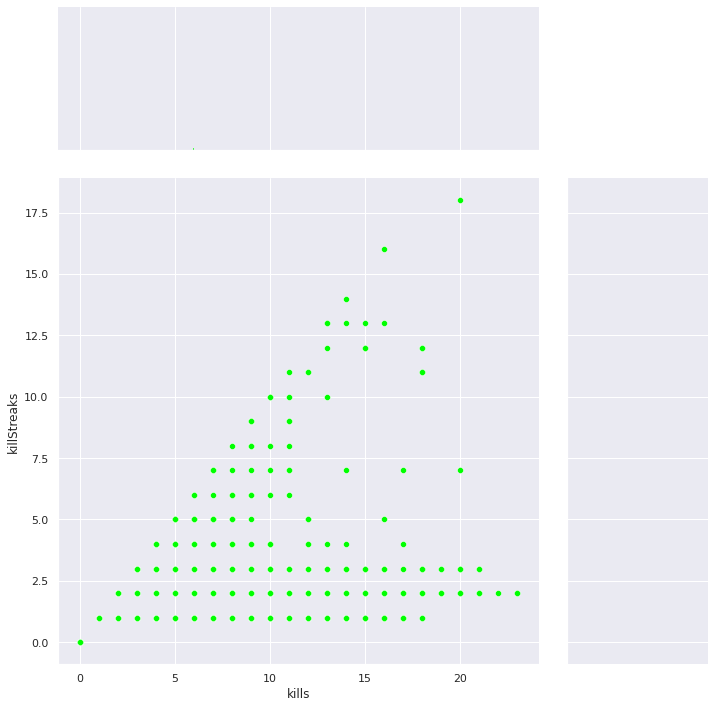

In [ ]:
sns.jointplot(x="kills", y="killStreaks", data=df_train_solo, height=10, ratio=3, color="lime")
plt.show()

# 전처리

In [ ]:
train = df_train.copy()
test = df_test.copy()

In [ ]:
train.drop(['Id', 'groupId', 'matchId', 'killPlace', 'killPoints', 'matchDuration', 'numGroups', 'rankPoints',  'roadKills', 'teamKills', 'winPoints', 'matchDuration', 'vehicleDestroys'], axis = 1, inplace = True)
test.drop(['Id', 'groupId', 'matchId', 'killPlace', 'killPoints', 'matchDuration','numGroups', 'rankPoints',  'roadKills', 'teamKills', 'winPoints', 'matchDuration','vehicleDestroys'], axis = 1, inplace = True)
# 회의를 통한 컬럼 통일

In [ ]:
# # A = train[train['matchType']=='eventmatch'].index
# # train.drop(A, axis='index', inplace=True)
# B = test[test['matchType']=='eventmatch'].index
# test.drop(B, axis = 'index', inplace =True)
# # matchtype 내 eventmatch 삭제

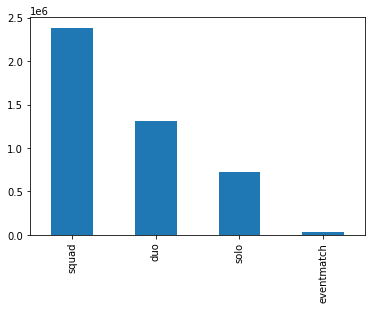

In [ ]:
train['matchType'].value_counts().plot.bar()
plt.show()


In [ ]:
train

,assists,damageDealt,DBNOs,headshotKills,kills,killStreaks,longestKill,matchType,maxPlace,revives,weaponsAcquired,winPlacePerc,Distance,heals and boosts
0,0,0.00,0,0,0,0,0.00,3,28,0,1,0.4444,244.8000,0
1,0,91.47,0,0,0,0,0.00,3,26,0,5,0.6400,1445.0445,0
2,1,68.00,0,0,0,0,0.00,2,50,0,2,0.7755,161.8000,0
3,0,32.90,0,0,0,0,0.00,3,31,0,3,0.1667,202.7000,0
4,0,100.00,0,0,1,1,58.53,1,97,0,2,0.1875,49.7500,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,0,0.00,0,0,0,0,0.00,3,29,0,3,0.1786,2311.0000,0
4446962,0,44.15,0,0,0,0,0.00,1,93,0,6,0.2935,81.7000,1
4446963,0,59.06,0,0,0,0,0.00,3,28,0,4,0.4815,790.8840,0
4446964,0,180.40,1,1,2,1,98.50,3,26,2,8,0.8000,2748.0000,6


In [ ]:
train.isnull().sum()

In [ ]:
# train['Distance'] = train['rideDistance'] + train['walkDistance'] + train['swimDistance']
# test['Distance'] = test['rideDistance'] + test['walkDistance'] + test['swimDistance']
# train.drop(['rideDistance', 'walkDistance', 'swimDistance'], axis = 1, inplace = True)
# test.drop(['rideDistance', 'walkDistance', 'swimDistance'], axis = 1, inplace = True)
# # Distance 통일

In [ ]:
train.loc[(train['matchType']=='solo'), 'matchType'] = 1
train.loc[(train['matchType']=='duo'), 'matchType'] = 2
train.loc[(train['matchType']=='squad'), 'matchType'] = 3
train.loc[(train['matchType']=='eventmatch'), 'matchType'] = 4

In [ ]:
test.loc[(test['matchType']=='solo'), 'matchType'] = 1
test.loc[(test['matchType']=='duo'), 'matchType'] = 2
test.loc[(test['matchType']=='squad'), 'matchType'] = 3
test.loc[(test['matchType']=='eventmatch'), 'matchType'] = 4

In [ ]:
# train['heals and boosts'] = train['heals'] + train['boosts']
# test['heals and boosts'] = test['heals'] + test['boosts']
# train.drop(['heals', 'boosts'], axis = 1, inplace = True)
# test.drop(['heals', 'boosts'], axis = 1, inplace = True)
# # heals 와 boosts 합치기

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4446965 entries, 0 to 4446965
Data columns (total 17 columns):
 #   Column           Dtype  
---  ------           -----  
 0   assists          int64  
 1   boosts           int64  
 2   damageDealt      float64
 3   DBNOs            int64  
 4   headshotKills    int64  
 5   heals            int64  
 6   kills            int64  
 7   killStreaks      int64  
 8   longestKill      float64
 9   matchType        object 
 10  maxPlace         int64  
 11  revives          int64  
 12  rideDistance     float64
 13  swimDistance     float64
 14  walkDistance     float64
 15  weaponsAcquired  int64  
 16  winPlacePerc     float64
dtypes: float64(6), int64(10), object(1)
memory usage: 739.7+ MB


# 첫번째 EDA

## 움직인 거리와 longest kill

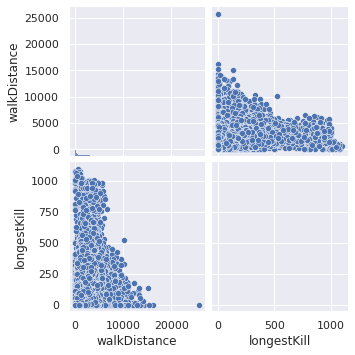

In [ ]:
sns.set()
cols = ['walkDistance', 'longestKill']
sns.pairplot(train[cols], size=2.5)
plt.show()

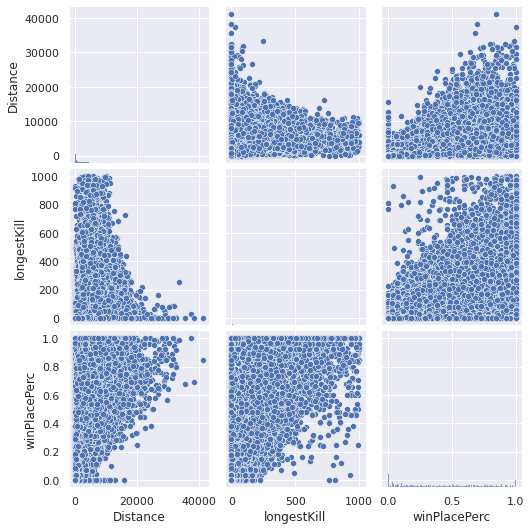

In [ ]:
sns.set()
cols = ['Distance', 'longestKill', 'winPlacePerc']
sns.pairplot(train[cols], size=2.5)
plt.show()

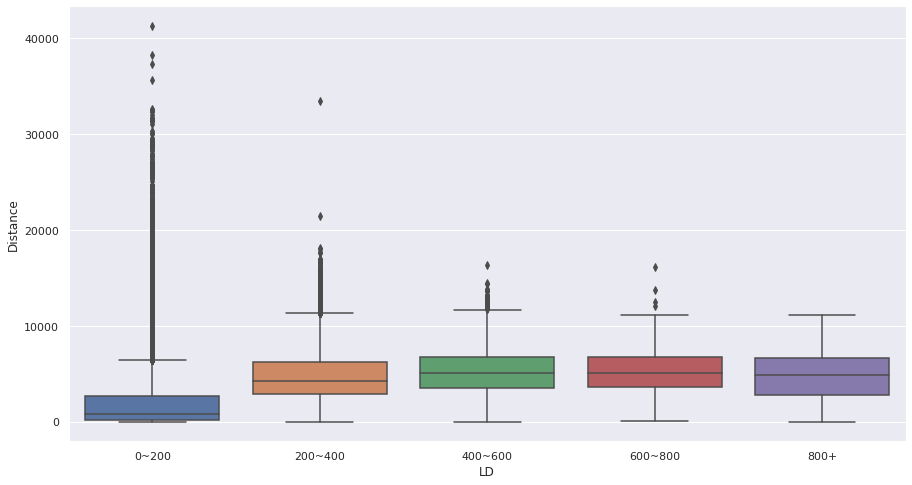

In [ ]:
longD = train.copy()
longD['LD'] = pd.cut(longD['longestKill'], [-1, 200, 400, 600, 800, 1300], labels = ['0~200','200~400', '400~600', '600~800', '800+'])

plt.figure(figsize=(15,8))
sns.boxplot(x="LD", y="Distance", data=longD)
plt.show()

-distance가 0인 데이터들은 제외를 시켜야 하지 않나?

## distance 이상치 확인

In [ ]:
train.describe(include = np.number).drop('count').T

,mean,std,min,25%,50%,75%,max
assists,0.233815,0.588573,0.0,0.000000,0.000000,0.000000,22.0
boosts,1.106908,1.715794,0.0,0.000000,0.000000,2.000000,33.0
damageDealt,NaN,NaN,0.0,0.000000,84.250000,186.000000,6616.0
DBNOs,0.657876,1.145743,0.0,0.000000,0.000000,1.000000,53.0
headshotKills,0.226820,0.602155,0.0,0.000000,0.000000,0.000000,64.0
heals,1.370148,2.679982,0.0,0.000000,0.000000,2.000000,80.0
kills,0.924784,1.558445,0.0,0.000000,0.000000,1.000000,72.0
killStreaks,0.543955,0.710972,0.0,0.000000,0.000000,1.000000,20.0
longestKill,NaN,NaN,0.0,0.000000,0.000000,21.312500,1094.0
maxPlace,44.504680,23.828099,2.0,28.000000,30.000000,49.000000,100.0


### rideDistance

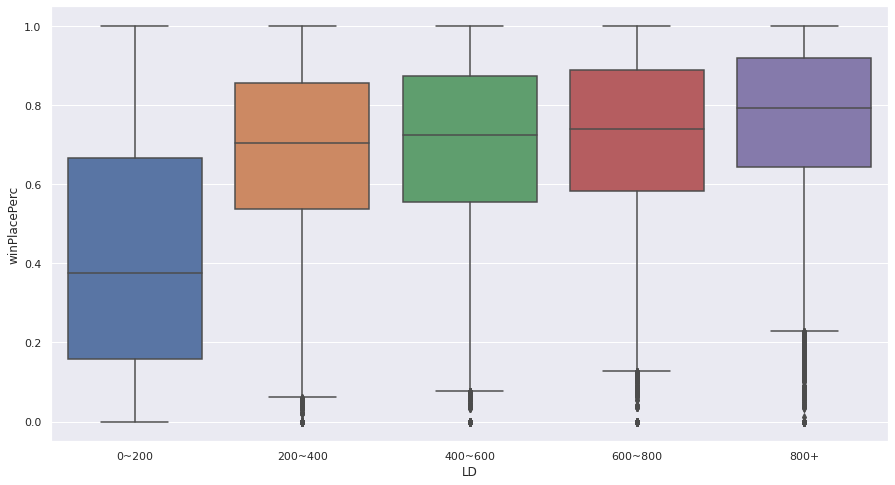

In [ ]:
longD = train.copy()
longD['LD'] = pd.cut(longD['rideDistance'], [-1, 1000, 2000, 3000, 4000, 40000], labels = ['0~200','200~400', '400~600', '600~800', '800+'])

plt.figure(figsize=(15,8))
sns.boxplot(x="LD", y="winPlacePerc", data=longD)
plt.show()

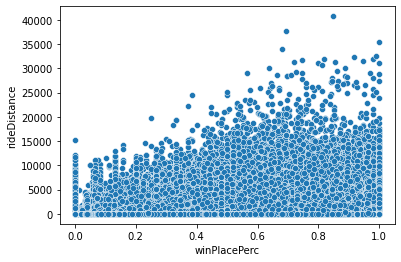

In [ ]:
sns.scatterplot(data=train, x='winPlacePerc', y='rideDistance')
plt.show()

In [ ]:
sns.jointplot(x='winPlacePerc', y='rideDistance', data=train, height=10, ratio=3)
plt.show()

###walkDistance

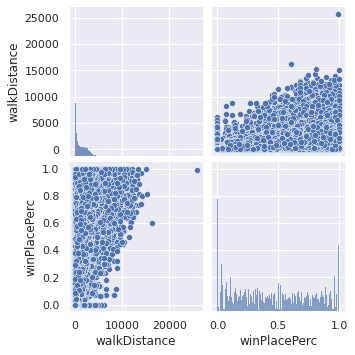

In [ ]:
sns.set()
cols = ['walkDistance', 'winPlacePerc']
sns.pairplot(train[cols], size=2.5)
plt.show()

In [ ]:
train[train['walkDistance']>=20000]
# 움직인 거리가 많으며 거의 1등을 함, 킬 0, 무기획득 0, 애초에 이 전략이였던 것 walkdistance의 가중치가 너무 커지는게 아닌가.

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,kills,killStreaks,longestKill,matchType,maxPlace,revives,rideDistance,swimDistance,walkDistance,weaponsAcquired,winPlacePerc
497965,0,0,0.0,0,0,0,0,0,0.0,1,95,0,0.007801,382.0,25776.0,0,0.989258


In [ ]:
train[train['rideDistance']>=30000]

-scaling 해보는건 어떤지

In [ ]:
train_walk = train.copy()
train_walk.loc(['walkDistance']>)

### swimDistance

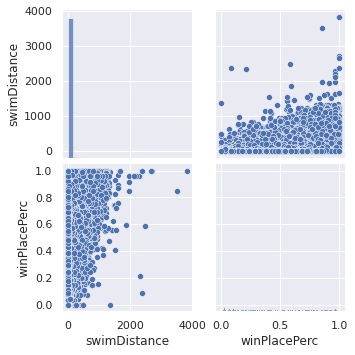

In [ ]:
sns.set()
cols = ['swimDistance', 'winPlacePerc']
sns.pairplot(train[cols], size=2.5)
plt.show()

In [ ]:
train[train['swimDistance']>=1500]

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,kills,killStreaks,longestKill,matchType,maxPlace,revives,rideDistance,swimDistance,walkDistance,weaponsAcquired,winPlacePerc
177973,0,5,78.12500,1,0,1,0,0,0.000000,2,50,0,0.000000,2296.0,1002.000000,4,0.958984
274258,0,4,53.31250,0,0,16,0,0,0.000000,3,26,0,5688.000000,2148.0,2276.000000,5,0.959961
605711,0,0,0.00000,0,0,0,0,0,0.000000,3,28,0,1017.000000,1537.0,1036.000000,4,0.407471
766045,0,0,100.00000,1,0,0,0,0,0.000000,3,28,1,0.007801,1542.0,1928.000000,0,0.555664
845213,0,0,0.00000,0,0,0,0,0,0.000000,1,94,0,0.000000,1974.0,18.687500,0,0.849609
1005337,0,1,503.00000,4,3,1,3,1,868.500000,3,26,0,3332.000000,2718.0,4692.000000,5,1.000000
1043642,0,0,0.00000,0,0,0,0,0,0.000000,3,28,0,1904.000000,1870.0,1176.000000,3,0.592773
1092681,2,5,264.00000,1,0,4,2,1,44.281250,2,50,0,0.000000,1980.0,1341.000000,4,0.958984
1195818,0,7,352.25000,3,1,6,5,1,64.500000,2,49,0,0.000000,2668.0,415.000000,10,1.000000
1227362,0,1,589.00000,3,1,1,2,1,48.218750,4,12,0,0.000000,3824.0,995.500000,9,1.000000


### distance가 0인 데이터 



In [ ]:
train[train['walkDistance']==0]

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,kills,killStreaks,longestKill,matchType,maxPlace,revives,rideDistance,swimDistance,walkDistance,weaponsAcquired,winPlacePerc
29,0,0,0.0,0,0,0,0,0,0.0,2,46,0,0.0,0.0,0.0,0,0.000000
116,0,0,0.0,0,0,0,0,0,0.0,2,41,0,0.0,0.0,0.0,0,0.000000
151,0,0,0.0,0,0,0,0,0,0.0,2,48,0,0.0,0.0,0.0,0,0.000000
237,0,0,0.0,0,0,0,0,0,0.0,3,29,0,0.0,0.0,0.0,0,0.000000
283,0,0,0.0,0,0,0,0,0,0.0,2,48,0,0.0,0.0,0.0,0,0.127686
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446843,0,0,0.0,0,0,0,0,0,0.0,3,30,0,0.0,0.0,0.0,0,0.000000
4446849,0,0,0.0,0,0,0,0,0,0.0,1,98,0,0.0,0.0,0.0,0,0.041199
4446905,0,0,0.0,0,0,0,0,0,0.0,2,49,0,0.0,0.0,0.0,1,0.041687
4446926,0,0,0.0,0,0,0,0,0,0.0,3,29,0,0.0,0.0,0.0,0,0.000000


### distance가 0이며 damagedealt가 의심되는 값

In [ ]:
train1 = train[train['walkDistance']==0][train['kills']!=0]
train1['damageDealt'].nunique()

1138

In [ ]:
train1

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,kills,killStreaks,longestKill,matchType,maxPlace,revives,rideDistance,swimDistance,walkDistance,weaponsAcquired,winPlacePerc
1824,0,0,593.000000,0,0,3,6,3,23.546875,4,15,0,0.0,0.0,0.0,8,0.856934
6673,2,0,346.500000,0,0,6,3,1,6.523438,4,11,0,0.0,0.0,0.0,22,0.600098
11892,2,0,1750.000000,0,4,5,20,6,37.093750,4,20,0,0.0,0.0,0.0,13,0.894531
14631,0,0,157.750000,0,0,0,1,1,21.546875,4,19,0,0.0,0.0,0.0,7,0.000000
15591,0,0,100.000000,0,1,0,1,1,55.437500,4,11,0,0.0,0.0,0.0,10,0.300049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4440232,0,0,4.316406,0,0,0,1,1,41.250000,4,10,0,0.0,0.0,0.0,7,0.888672
4440898,0,0,90.812500,0,0,4,1,1,48.218750,4,2,0,0.0,0.0,0.0,8,0.000000
4440927,2,2,909.000000,7,2,16,6,2,154.750000,4,11,0,0.0,0.0,0.0,7,0.600098
4441511,6,2,696.500000,9,2,0,9,2,89.500000,4,11,10,0.0,0.0,0.0,16,0.899902


In [ ]:
train1[train1['damageDealt']==100]

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,kills,killStreaks,longestKill,matchType,maxPlace,revives,rideDistance,swimDistance,walkDistance,weaponsAcquired,winPlacePerc
15591,0,0,100.0,0,1,0,1,1,55.437500,4,11,0,0.0,0.0,0.0,10,0.300049
50388,0,0,100.0,0,0,0,1,1,17.609375,1,88,0,0.0,0.0,0.0,1,0.057495
91841,0,0,100.0,1,0,0,1,1,8.664062,2,43,0,0.0,0.0,0.0,1,0.023804
94460,0,0,100.0,0,1,0,1,1,3.595703,1,97,0,0.0,0.0,0.0,1,0.052094
95288,0,0,100.0,0,0,0,1,1,1.228516,1,98,0,0.0,0.0,0.0,0,0.020599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4375614,0,0,100.0,1,0,0,1,1,4.957031,3,27,0,0.0,0.0,0.0,1,0.038513
4392074,0,0,100.0,0,1,0,1,1,55.281250,1,96,0,0.0,0.0,0.0,1,0.020996
4396644,0,0,100.0,0,0,0,1,1,15.460938,1,96,0,0.0,0.0,0.0,1,0.020996
4420884,0,0,100.0,1,0,0,1,1,21.796875,4,9,0,0.0,0.0,0.0,8,0.375000


## distance scaling

### min-max normalization

#### 1번 시도

In [ ]:
tr_scale=train.copy()
ts_scale=test.copy()

In [ ]:
tr_scale['walkDistance']

0           244.7500
1          1434.0000
2           161.7500
3           202.7500
4            49.7500
             ...    
4446961    1019.0000
4446962      81.6875
4446963     788.5000
4446964    2748.0000
4446965    1244.0000
Name: walkDistance, Length: 4446965, dtype: float16

In [ ]:
tr_scale['walkDistance']-tr_scale['walkDistance'].min()

0           244.7500
1          1434.0000
2           161.7500
3           202.7500
4            49.7500
             ...    
4446961    1019.0000
4446962      81.6875
4446963     788.5000
4446964    2748.0000
4446965    1244.0000
Name: walkDistance, Length: 4446965, dtype: float16

In [ ]:
(tr_scale['walkDistance']-tr_scale['walkDistance'].min()) / tr_scale['walkDistance'].max() - tr_scale['walkDistance'].min()

0          0.009496
1          0.055625
2          0.006276
3          0.007863
4          0.001930
             ...   
4446961    0.039527
4446962    0.003169
4446963    0.030593
4446964    0.106594
4446965    0.048254
Name: walkDistance, Length: 4446965, dtype: float64

In [ ]:
tr_scale

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,kills,killStreaks,longestKill,matchType,maxPlace,revives,rideDistance,swimDistance,walkDistance,weaponsAcquired,winPlacePerc
0,0,0,0.00,0,0,0,0,0,0.00,3,28,0,0.0000,0.000,244.80,1,0.4444
1,0,0,91.47,0,0,0,0,0,0.00,3,26,0,0.0045,11.040,1434.00,5,0.6400
2,1,0,68.00,0,0,0,0,0,0.00,2,50,0,0.0000,0.000,161.80,2,0.7755
3,0,0,32.90,0,0,0,0,0,0.00,3,31,0,0.0000,0.000,202.70,3,0.1667
4,0,0,100.00,0,0,0,1,1,58.53,1,97,0,0.0000,0.000,49.75,2,0.1875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,0,0,0.00,0,0,0,0,0,0.00,3,29,0,1292.0000,0.000,1019.00,3,0.1786
4446962,0,1,44.15,0,0,0,0,0,0.00,1,93,0,0.0000,0.000,81.70,6,0.2935
4446963,0,0,59.06,0,0,0,0,0,0.00,3,28,0,0.0000,2.184,788.70,4,0.4815
4446964,0,4,180.40,1,1,2,2,1,98.50,3,26,2,0.0000,0.000,2748.00,8,0.8000


In [ ]:
ts_scale

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,kills,killStreaks,longestKill,matchType,maxPlace,revives,rideDistance,swimDistance,walkDistance,weaponsAcquired
0,0,0,51.468750,0,0,0,0,0,0.0000,3,28,0,0.0,0.000000,588.000,1
1,0,4,179.125000,0,0,2,2,1,362.0000,2,48,2,4668.0,0.000000,2017.000,6
2,1,0,23.406250,0,0,4,0,0,0.0000,3,28,0,0.0,0.000000,788.000,4
3,0,0,65.500000,0,0,0,0,0,0.0000,2,45,0,0.0,0.000000,1812.000,3
4,0,4,330.250000,1,2,1,3,1,60.0625,3,28,1,0.0,0.000000,2964.000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1934169,1,2,381.000000,3,0,7,4,2,69.2500,3,22,1,0.0,0.000000,1799.000,5
1934170,0,0,0.000000,0,0,0,0,0,0.0000,3,27,0,0.0,0.000000,1195.000,3
1934171,0,0,91.937500,0,0,3,1,1,25.3750,3,29,0,0.0,7.796875,3328.000,3
1934172,1,2,138.625000,0,0,12,1,1,67.8750,2,49,1,0.0,0.000000,1893.000,4


#### 2번시도

In [ ]:
from sklearn.preprocessing import MinMaxScaler
tr_scale_dropwin = tr_scale.drop('winPlacePerc', axis = 1)
scaler = MinMaxScaler()
scaler.fit(tr_scale_dropwin)
df_tr_scale = scaler.transform(tr_scale_dropwin)
df_tr_scale = pd.DataFrame(data = df_tr_scale, columns= tr_scale_dropwin.columns)

In [ ]:
scaler = MinMaxScaler()
scaler.fit(ts_scale)
df_ts_scale = scaler.transform(ts_scale)
df_ts_scale = pd.DataFrame(data = df_ts_scale, columns = ts_scale.columns)

In [ ]:
df_tr_scale['winPlacePerc'] = tr_scale['winPlacePerc']
df_tr_scale

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,kills,killStreaks,longestKill,matchType,maxPlace,revives,rideDistance,swimDistance,walkDistance,weaponsAcquired,winPlacePerc
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.00,0.000000,0.666667,0.265306,0.000000,0.000000e+00,0.000000,0.009496,0.004237,0.4444
1,0.000000,0.000000,0.013826,0.000000,0.000000,0.0000,0.000000,0.00,0.000000,0.666667,0.244898,0.000000,1.105380e-07,0.002888,0.055625,0.021186,0.6400
2,0.045455,0.000000,0.010278,0.000000,0.000000,0.0000,0.000000,0.00,0.000000,0.333333,0.489796,0.000000,0.000000e+00,0.000000,0.006276,0.008475,0.7755
3,0.000000,0.000000,0.004973,0.000000,0.000000,0.0000,0.000000,0.00,0.000000,0.666667,0.295918,0.000000,0.000000e+00,0.000000,0.007863,0.012712,0.1667
4,0.000000,0.000000,0.015115,0.000000,0.000000,0.0000,0.013889,0.05,0.053501,0.000000,0.969388,0.000000,0.000000e+00,0.000000,0.001930,0.008475,0.1875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446960,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.00,0.000000,0.666667,0.275510,0.000000,3.173667e-02,0.000000,0.039527,0.012712,0.2414
4446961,0.000000,0.030303,0.006673,0.000000,0.000000,0.0000,0.000000,0.00,0.000000,0.000000,0.928571,0.000000,0.000000e+00,0.000000,0.003169,0.025424,0.1786
4446962,0.000000,0.000000,0.008927,0.000000,0.000000,0.0000,0.000000,0.00,0.000000,0.666667,0.265306,0.000000,0.000000e+00,0.000571,0.030593,0.016949,0.2935
4446963,0.000000,0.121212,0.027267,0.018868,0.015625,0.0250,0.027778,0.05,0.090037,0.666667,0.244898,0.051282,0.000000e+00,0.000000,0.106594,0.033898,0.4815


In [ ]:
df_ts_scale

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,kills,killStreaks,longestKill,matchType,maxPlace,revives,rideDistance,swimDistance,walkDistance,weaponsAcquired
0,0.000000,0.000000,0.008261,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.666667,0.265306,0.00,0.000000,0.000000,0.039437,0.006536
1,0.000000,0.166667,0.028753,0.000000,0.00000,0.026667,0.034483,0.066667,0.360458,0.333333,0.469388,0.10,0.114717,0.000000,0.135278,0.039216
2,0.037037,0.000000,0.003757,0.000000,0.00000,0.053333,0.000000,0.000000,0.000000,0.666667,0.265306,0.00,0.000000,0.000000,0.052837,0.026144
3,0.000000,0.000000,0.010519,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.333333,0.438776,0.00,0.000000,0.000000,0.121529,0.019608
4,0.000000,0.166667,0.053010,0.016949,0.04878,0.013333,0.051724,0.066667,0.059821,0.666667,0.265306,0.05,0.000000,0.000000,0.198726,0.026144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1934169,0.037037,0.083333,0.061166,0.050847,0.00000,0.093333,0.068966,0.133333,0.068994,0.666667,0.204082,0.05,0.000000,0.000000,0.120657,0.032680
1934170,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.666667,0.255102,0.00,0.000000,0.000000,0.080148,0.019608
1934171,0.000000,0.000000,0.014763,0.000000,0.00000,0.040000,0.017241,0.066667,0.025279,0.666667,0.275510,0.00,0.000000,0.002384,0.223139,0.019608
1934172,0.037037,0.083333,0.022251,0.000000,0.00000,0.160000,0.017241,0.066667,0.067620,0.333333,0.479592,0.05,0.000000,0.000000,0.126962,0.026144


### standardization

#### 1번째

In [ ]:
tr_scale['rideDistance'].mean(), tr_scale['rideDistance'].std()

(606.1158054527955, 1498.3436539060096)

In [ ]:
tr_scale['rideDistance'] = (tr_scale['rideDistance']-tr_scale['rideDistance'].mean()) \
/(tr_scale['rideDistance'].std())

In [ ]:
tr_scale

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,kills,killStreaks,longestKill,matchType,maxPlace,revives,rideDistance,swimDistance,walkDistance,weaponsAcquired,winPlacePerc
0,0,0,0.00,0,0,0,0,0,0.00,3,28,0,-0.404524,0.000,244.80,1,0.4444
1,0,0,91.47,0,0,0,0,0,0.00,3,26,0,-0.404521,11.040,1434.00,5,0.6400
2,1,0,68.00,0,0,0,0,0,0.00,2,50,0,-0.404524,0.000,161.80,2,0.7755
3,0,0,32.90,0,0,0,0,0,0.00,3,31,0,-0.404524,0.000,202.70,3,0.1667
4,0,0,100.00,0,0,0,1,1,58.53,1,97,0,-0.404524,0.000,49.75,2,0.1875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,0,0,0.00,0,0,0,0,0,0.00,3,29,0,0.457762,0.000,1019.00,3,0.1786
4446962,0,1,44.15,0,0,0,0,0,0.00,1,93,0,-0.404524,0.000,81.70,6,0.2935
4446963,0,0,59.06,0,0,0,0,0,0.00,3,28,0,-0.404524,2.184,788.70,4,0.4815
4446964,0,4,180.40,1,1,2,2,1,98.50,3,26,2,-0.404524,0.000,2748.00,8,0.8000


In [ ]:
def feture_scaling(df, scaling_strategy="min-max", column=None):
    if column == None:
        column = [column_name for column_name in df.columns]
    for column_name in column:
        if scaling_strategy == "min-max":
            df[column_name] = ( df[column_name] - df[column_name].min() ) /\
                            (df[column_name].max() - df[column_name].min()) 
        elif scaling_strategy == "z-score":
            df[column_name] = ( df[column_name] - \
                               df[column_name].mean() ) /\
                            (df[column_name].std() )
    return df

In [ ]:
feture_scaling(tr_scale,column=["walkDistance","rideDistance"])

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,kills,killStreaks,longestKill,matchType,maxPlace,revives,rideDistance,swimDistance,walkDistance,weaponsAcquired,winPlacePerc
0,0,0,0.00,0,0,0,0,0,0.00,3,28,0,0.000000e+00,0.000,0.009496,1,0.4444
1,0,0,91.47,0,0,0,0,0,0.00,3,26,0,1.105380e-07,11.040,0.055625,5,0.6400
2,1,0,68.00,0,0,0,0,0,0.00,2,50,0,0.000000e+00,0.000,0.006276,2,0.7755
3,0,0,32.90,0,0,0,0,0,0.00,3,31,0,0.000000e+00,0.000,0.007863,3,0.1667
4,0,0,100.00,0,0,0,1,1,58.53,1,97,0,0.000000e+00,0.000,0.001930,2,0.1875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,0,0,0.00,0,0,0,0,0,0.00,3,29,0,3.173667e-02,0.000,0.039527,3,0.1786
4446962,0,1,44.15,0,0,0,0,0,0.00,1,93,0,0.000000e+00,0.000,0.003169,6,0.2935
4446963,0,0,59.06,0,0,0,0,0,0.00,3,28,0,0.000000e+00,2.184,0.030593,4,0.4815
4446964,0,4,180.40,1,1,2,2,1,98.50,3,26,2,0.000000e+00,0.000,0.106594,8,0.8000


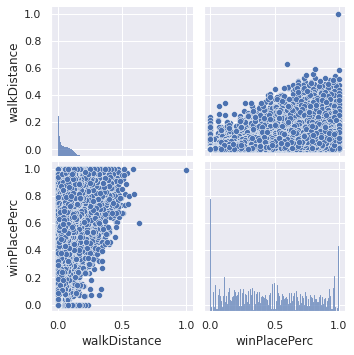

In [ ]:
sns.set()
cols = ['walkDistance', 'winPlacePerc']
sns.pairplot(tr_scale[cols], size=2.5)
plt.show()

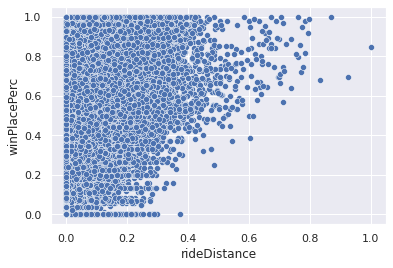

In [ ]:
sns.scatterplot(data=tr_scale, x='rideDistance', y='winPlacePerc')
plt.show()

####2번째

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler

scaler.fit(tr_scale)
df_tr_Sscale = scaler.transform(tr_scale)

df_tr_Sscale = pd.DataFrame(data = df_tr_Sscale)

NameError: ignored

#### 3번째

In [ ]:
from sklearn.preprocessing import StandardScaler
X_drop_winPlacePerc = tr_scale.drop('winPlacePerc', axis =1)
X_num = X_drop_winPlacePerc
scaler = StandardScaler()
scaler.fit(X_num)
X_scaled = scaler.transform(X_num)
X_scaled = pd.DataFrame(X_scaled, index = X_num.index, columns = X_num.columns)

ValueError: ignored

In [ ]:
X_scaled['winPlacePerc'] = tr_scale['winPlacePerc']

In [ ]:
X_scaled

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,kills,killStreaks,longestKill,matchType,maxPlace,revives,rideDistance,swimDistance,walkDistance,weaponsAcquired,winPlacePerc
0,-0.397257,-0.645129,-0.765410,-0.574191,-0.376680,-0.511252,-0.593402,-0.765087,-0.451176,0.802978,-0.692656,-0.348730,-0.404524,-0.147836,-0.768416,-1.083021,0.4444
1,-0.397257,-0.645129,-0.229810,-0.574191,-0.376680,-0.511252,-0.593402,-0.765087,-0.451176,0.802978,-0.776591,-0.348730,-0.404521,0.214105,0.236403,0.545283,0.6400
2,1.301767,-0.645129,-0.367238,-0.574191,-0.376680,-0.511252,-0.593402,-0.765087,-0.451176,-0.513489,0.230624,-0.348730,-0.404524,-0.147836,-0.838547,-0.675945,0.7755
3,-0.397257,-0.645129,-0.572765,-0.574191,-0.376680,-0.511252,-0.593402,-0.765087,-0.451176,0.802978,-0.566754,-0.348730,-0.404524,-0.147836,-0.803989,-0.268869,0.1667
4,-0.397257,-0.645129,-0.179863,-0.574191,-0.376680,-0.511252,0.048264,0.641438,0.697088,-1.829956,2.203085,-0.348730,-0.404524,-0.147836,-0.933224,-0.675945,0.1875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,-0.397257,-0.645129,-0.765410,-0.574191,-0.376680,-0.511252,-0.593402,-0.765087,-0.451176,0.802978,-0.650689,-0.348730,0.457762,-0.147836,-0.114253,-0.268869,0.1786
4446962,-0.397257,-0.062308,-0.506891,-0.574191,-0.376680,-0.511252,-0.593402,-0.765087,-0.451176,-1.829956,2.035216,-0.348730,-0.404524,-0.147836,-0.906228,0.952359,0.2935
4446963,-0.397257,-0.645129,-0.419586,-0.574191,-0.376680,-0.511252,-0.593402,-0.765087,-0.451176,0.802978,-0.692656,-0.348730,-0.404524,-0.076235,-0.308846,0.138207,0.4815
4446964,-0.397257,1.686154,0.290916,0.298605,1.284022,0.235021,0.689929,0.641438,1.481235,0.802978,-0.776591,3.887058,-0.404524,-0.147836,1.346672,1.766512,0.8000


# 2번째 EDA

In [ ]:
pd.set_option('display.max_columns', 30)

In [ ]:
train

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,1241,0,0,0.00,1306,3,28,26,-1,0,0.0000,0,0.000,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,0,0,0,0.00,1777,3,26,25,1484,0,0.0045,0,11.040,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,0,0,0,0.00,1318,2,50,47,1491,0,0.0000,0,0.000,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,0,0,0,0.00,1436,3,31,30,1408,0,0.0000,0,0.000,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,0,1,1,58.53,1424,1,97,95,1560,0,0.0000,0,0.000,0,0,49.75,2,0,0.1875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.00,0,0,0,74,1029,0,0,0.00,1873,3,29,28,-1,0,1292.0000,0,0.000,0,0,1019.00,3,1507,0.1786
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.15,0,0,0,69,0,0,0,0.00,1435,1,93,93,1501,0,0.0000,0,0.000,0,0,81.70,6,0,0.2935
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06,0,0,0,66,0,0,0,0.00,1321,3,28,28,1500,0,0.0000,0,2.184,0,0,788.70,4,0,0.4815
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,4,180.40,1,1,2,11,0,2,1,98.50,1373,3,26,25,1418,2,0.0000,0,0.000,0,0,2748.00,8,0,0.8000


## 전처리

### matchType eventmatch 분리

In [ ]:
train_match = train[train['matchType']!=4]
test_match = test[test['matchType']!=4]

In [ ]:
train_match_f = train[train['matchType']==4]
test_match_f = test[test['matchType']==4]

In [ ]:
train_match

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,1241,0,0,0.00,1306,3,28,26,-1,0,0.0000,0,0.000,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,0,0,0,0.00,1777,3,26,25,1484,0,0.0045,0,11.040,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,0,0,0,0.00,1318,2,50,47,1491,0,0.0000,0,0.000,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,0,0,0,0.00,1436,3,31,30,1408,0,0.0000,0,0.000,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,0,1,1,58.53,1424,1,97,95,1560,0,0.0000,0,0.000,0,0,49.75,2,0,0.1875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.00,0,0,0,74,1029,0,0,0.00,1873,3,29,28,-1,0,1292.0000,0,0.000,0,0,1019.00,3,1507,0.1786
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.15,0,0,0,69,0,0,0,0.00,1435,1,93,93,1501,0,0.0000,0,0.000,0,0,81.70,6,0,0.2935
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06,0,0,0,66,0,0,0,0.00,1321,3,28,28,1500,0,0.0000,0,2.184,0,0,788.70,4,0,0.4815
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,4,180.40,1,1,2,11,0,2,1,98.50,1373,3,26,25,1418,2,0.0000,0,0.000,0,0,2748.00,8,0,0.8000


### assists

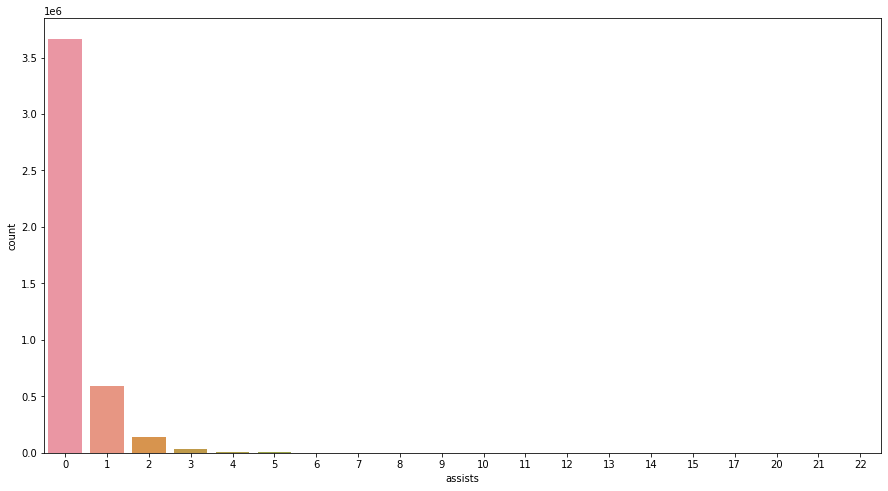

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(train['assists'])
plt.show()
#  5킬 이상은 데이터가 적음 / eventmatch인지 아닌지 확인 필요

In [ ]:
print(train[train['assists']>5])
print(train[train['assists']>5][train['matchType']==4])
# assists 수가 6 이상인 경우 matchType이 eventmatch인 개수가 1757개 중  882개
#

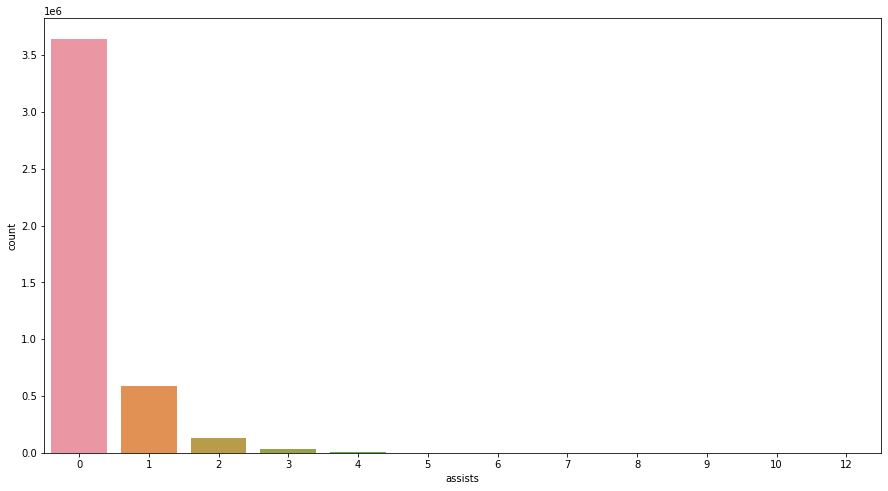

In [ ]:
plt.figure(figsize = (15,8))
sns.countplot(train_match['assists'])
plt.show()
# assists가 0인 경우가 많고 5이상은 매우 적다.
# assists가 0인 경우 0
# 1~2인 경우 1
# 3~4인 경우 2
# 5이상인 3으로 범주형 데이터 생성

In [ ]:
train_match.loc[(train_match['assists']==0),'assists'] = 0
train_match.loc[(train_match['assists']<=2) & (train_match['assists']>=1),'assists'] = 1
train_match.loc[(train_match['assists']<=4) & (train_match['assists']>=3),'assists'] = 2
train_match.loc[(train_match['assists']>=5),'assists'] = 3

In [ ]:
test_match.loc[(test_match['assists']==0),'assists'] = 0
test_match.loc[(test_match['assists']<=2) & (test_match['assists']>=1),'assists'] = 1
test_match.loc[(test_match['assists']<=4) & (test_match['assists']>=3),'assists'] = 2
test_match.loc[(test_match['assists']>=5),'assists'] = 3

<function matplotlib.pyplot.show>

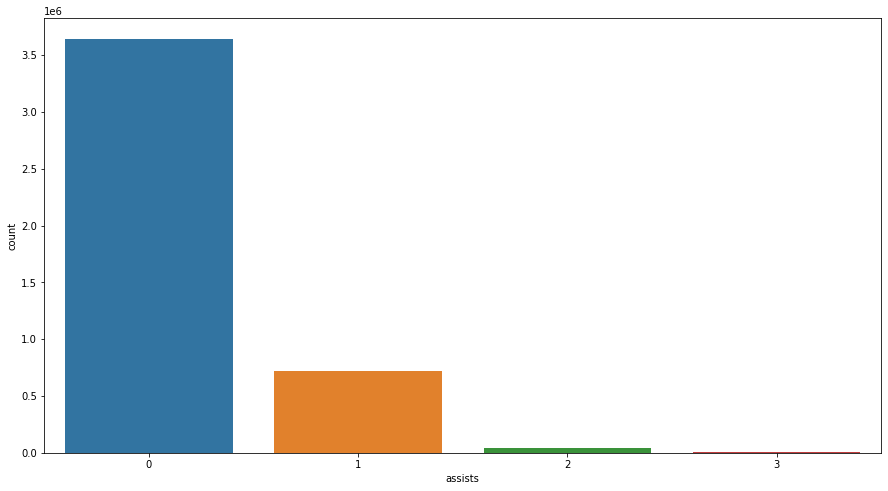

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(train_match['assists'])
plt.show

In [ ]:
train_match

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,1241,0,0,0.00,1306,3,28,26,-1,0,0.0000,0,0.000,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,0,0,0,0.00,1777,3,26,25,1484,0,0.0045,0,11.040,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,0,0,0,0.00,1318,2,50,47,1491,0,0.0000,0,0.000,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,0,0,0,0.00,1436,3,31,30,1408,0,0.0000,0,0.000,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,0,1,1,58.53,1424,1,97,95,1560,0,0.0000,0,0.000,0,0,49.75,2,0,0.1875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.00,0,0,0,74,1029,0,0,0.00,1873,3,29,28,-1,0,1292.0000,0,0.000,0,0,1019.00,3,1507,0.1786
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.15,0,0,0,69,0,0,0,0.00,1435,1,93,93,1501,0,0.0000,0,0.000,0,0,81.70,6,0,0.2935
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06,0,0,0,66,0,0,0,0.00,1321,3,28,28,1500,0,0.0000,0,2.184,0,0,788.70,4,0,0.4815
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,2,180.40,1,1,2,11,0,2,1,98.50,1373,3,26,25,1418,2,0.0000,0,0.000,0,0,2748.00,8,0,0.8000


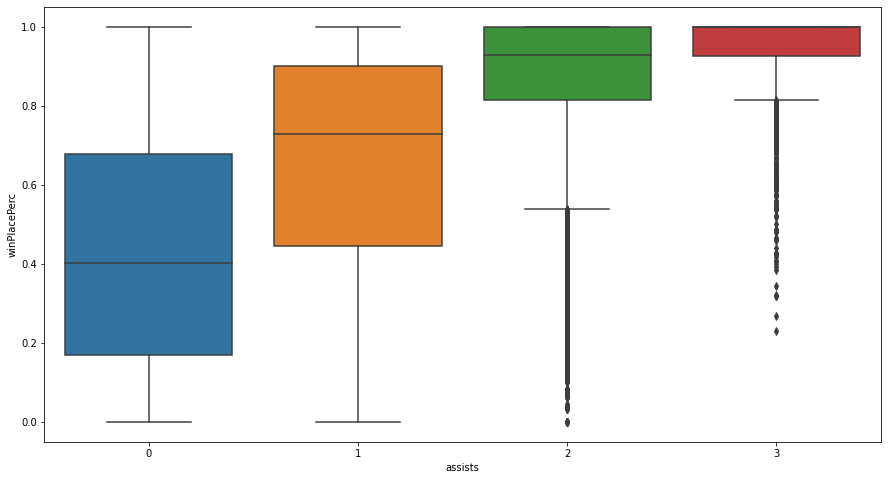

In [ ]:
plt.figure(figsize=(15, 8))
sns.boxplot(x='assists', y='winPlacePerc', data=train_match)
plt.show()

plt.figure(fig)

### boosts

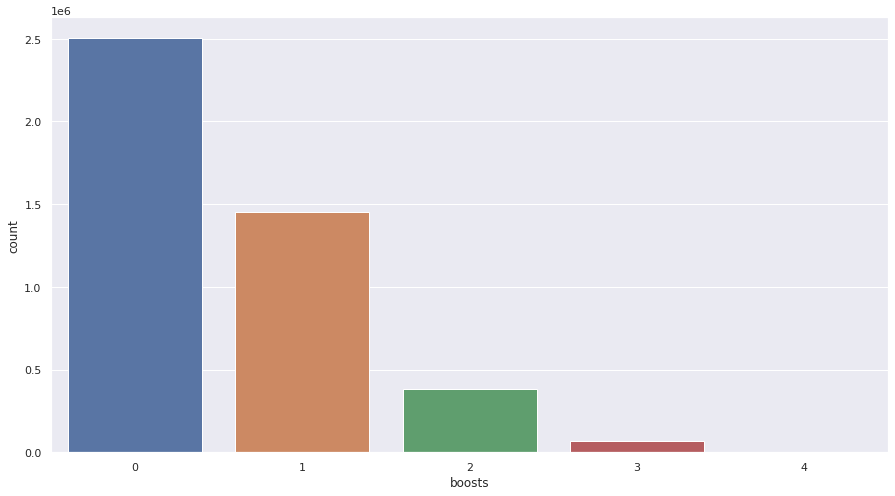

In [ ]:
plt.figure(figsize = (15,8))
sns.countplot(train_match['boosts'])
plt.show()
# boosts의 개수가 11개 이상부턴 데이터가 매우 적으나 33인 데이터가 있음

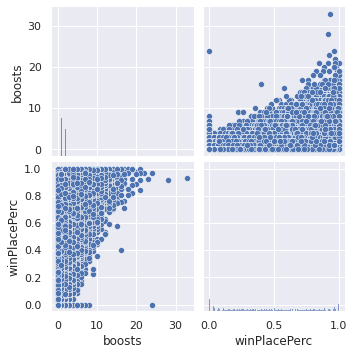

In [ ]:
sns.set()
cols=['boosts','winPlacePerc']
sns.pairplot(train_match[cols], size = 2.5)
plt.show()
# boosts의 개수가 많아짐에 따라 개수에 대한 승률의 비율이 높아짐
# 오버피팅을 고려해 20개 이상은 제거하거나 범주형 데이터로 바꾸는게 나을듯
# boosts 개수 0 = 0
# 1~3 = 1
# 4~6 = 2
# 7~10 = 3
# 11~ 4

In [ ]:
train_match.loc[(train_match['boosts']==0), 'boosts'] = 0
train_match.loc[(train_match['boosts']<=3) & (train_match['boosts']>=1), 'boosts'] = 1
train_match.loc[(train_match['boosts']<=6) & (train_match['boosts']>=4), 'boosts'] = 2
train_match.loc[(train_match['boosts']<=10) & (train_match['boosts']>=7), 'boosts'] = 3
train_match.loc[(train_match['boosts']>=11), 'boosts'] = 4

In [ ]:
test_match.loc[(test_match['boosts']==0), 'boosts'] = 0
test_match.loc[(test_match['boosts']<=3) & (test_match['boosts']>=1), 'boosts'] = 1
test_match.loc[(test_match['boosts']<=6) & (test_match['boosts']>=4), 'boosts'] = 2
test_match.loc[(test_match['boosts']<=10) & (test_match['boosts']>=7), 'boosts'] = 3
test_match.loc[(test_match['boosts']>=11), 'boosts'] = 4

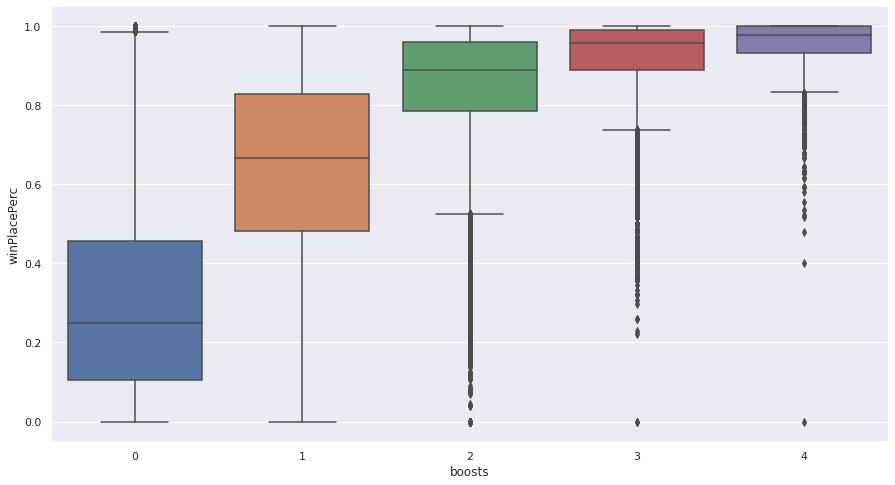

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(x='boosts', y='winPlacePerc', data = train_match)
plt.show()

###heals

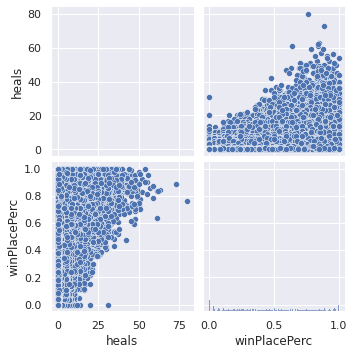

In [ ]:
sns.set()
cols = ['heals', 'winPlacePerc']
sns.pairplot(train_match[cols], size = 2.5)
plt.show()
# boosts랑 비슷한 양상을 보이는 듯 함, boosts랑 합쳐도 될까??

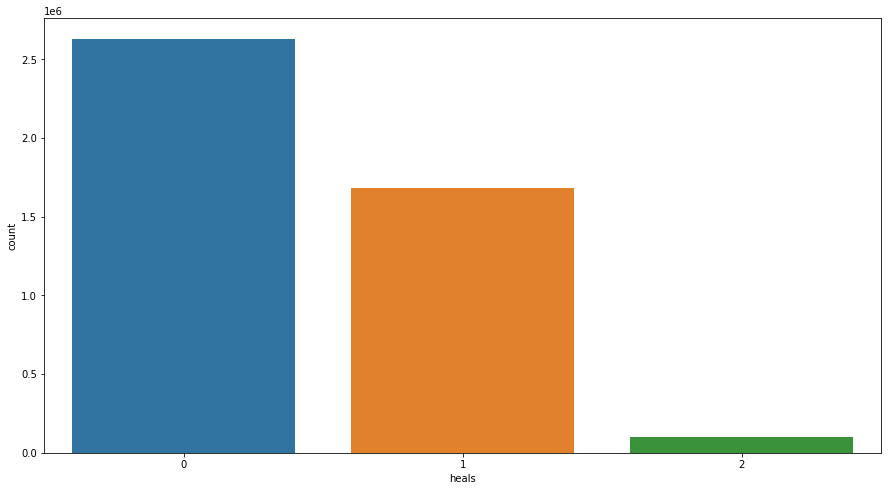

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(train_match['heals'])
plt.show()
# 최대 80개까지 있으며 10개 이상부터는 데이터 수가 적음

In [ ]:
train_match.loc[(train_match['heals']==0), 'heals'] = 0
train_match.loc[(train_match['heals']<=3) & (train_match['heals']>=1), 'heals'] = 1
train_match.loc[(train_match['heals']<=6) & (train_match['heals']>=4), 'heals'] = 2
train_match.loc[(train_match['heals']<=9) & (train_match['heals']>=7), 'heals'] = 3
train_match.loc[(train_match['heals']>=10), 'heals'] = 4 

In [ ]:
test_match.loc[(test_match['heals']==0), 'heals'] = 0
test_match.loc[(test_match['heals']<=3) & (test_match['heals']>=1), 'heals'] = 1
test_match.loc[(test_match['heals']<=6) & (test_match['heals']>=4), 'heals'] = 2
test_match.loc[(test_match['heals']<=9) & (test_match['heals']>=7), 'heals'] = 3
test_match.loc[(test_match['heals']>=10), 'heals'] = 4 

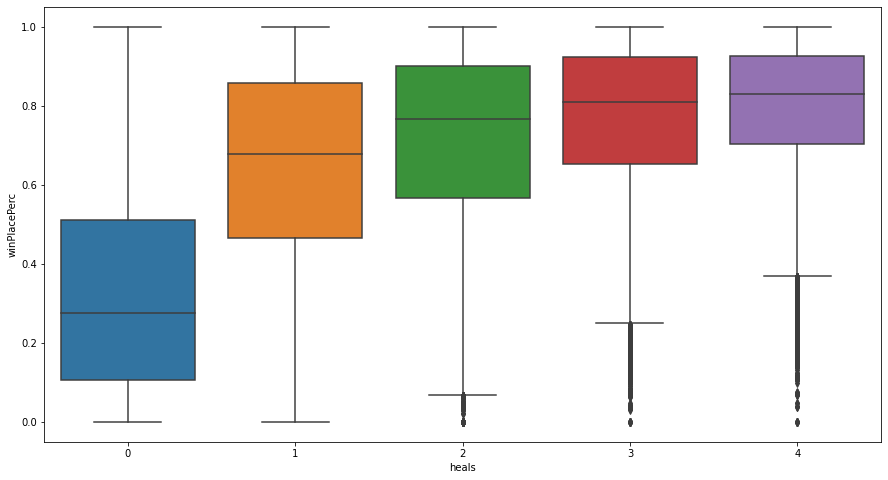

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(x='heals', y='winPlacePerc', data=train_match)
plt.show()
# heals와 관련해서 더 생각 해 볼 필요 있음

###damageDealt

In [ ]:
train_match.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,4.407646e+06,4.407646e+06,4407646.00,4.407646e+06,4.407646e+06,4.407646e+06,4.407646e+06,4.407646e+06,4.407646e+06,4.407646e+06,4.407646e+06,4.407646e+06,4.407646e+06,4.407646e+06,4.407646e+06,4.407646e+06,4.407646e+06,4.407646e+06,4407646.0,4.407646e+06,4.407646e+06,4407646.000,4.407646e+06,4.407646e+06,4.407646e+06
mean,1.849393e-01,5.522601e-01,NaN,6.547295e-01,2.237242e-01,6.138000e-01,4.774240e+01,5.062347e+02,5.062578e-01,5.413087e-01,NaN,1.580741e+03,4.468874e+01,4.318780e+01,8.913979e+02,1.642990e-01,NaN,2.997972e-03,NaN,2.364119e-02,7.686870e-03,NaN,3.631075e+00,6.070789e+02,NaN
std,4.178759e-01,7.222857e-01,NaN,1.124481e+00,5.861161e-01,9.239282e-01,2.746817e+01,6.284263e+02,6.599317e-01,7.083935e-01,NaN,2.544957e+02,2.381607e+01,2.327997e+01,7.367777e+02,4.708870e-01,NaN,6.487087e-02,NaN,1.660885e-01,9.090378e-02,NaN,2.322685e+00,7.398524e+02,0.000000e+00
min,0.000000e+00,0.000000e+00,0.00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.280000e+02,2.000000e+00,1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.367000e+03,2.800000e+01,2.700000e+01,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,154.625,2.000000e+00,0.000000e+00,1.999512e-01
50%,0.000000e+00,0.000000e+00,84.00,0.000000e+00,0.000000e+00,0.000000e+00,4.800000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.438000e+03,3.000000e+01,3.000000e+01,1.443000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,682.500,3.000000e+00,0.000000e+00,4.582520e-01
75%,0.000000e+00,1.000000e+00,185.25,1.000000e+00,0.000000e+00,1.000000e+00,7.100000e+01,1.174000e+03,1.000000e+00,1.000000e+00,2.109375e+01,1.850000e+03,4.900000e+01,4.700000e+01,1.500000e+03,0.000000e+00,9.902954e-03,0.000000e+00,0.0,0.000000e+00,0.000000e+00,1977.000,5.000000e+00,1.495000e+03,7.407227e-01
max,3.000000e+00,4.000000e+00,3796.00,3.200000e+01,2.600000e+01,4.000000e+00,1.000000e+02,2.170000e+03,4.000000e+00,1.800000e+01,1.003000e+03,2.237000e+03,1.000000e+02,1.000000e+02,5.910000e+03,3.900000e+01,4.070400e+04,1.800000e+01,3514.0,4.000000e+00,5.000000e+00,25776.000,2.360000e+02,2.013000e+03,1.000000e+00


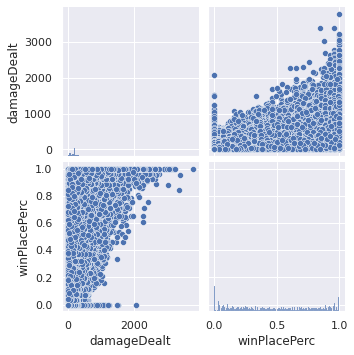

In [ ]:
sns.set()
cols = ['damageDealt', 'winPlacePerc']
sns.pairplot(train_match[cols], size=2.5)
plt.show()

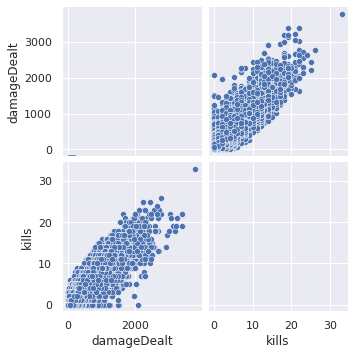

In [ ]:
sns.set()
cols = ['damageDealt', 'kills']
sns.pairplot(train_match[cols], size=2.5)
plt.show()
# damageDealt 와 kills 의 상관관계가 높아보임

###DBNOS

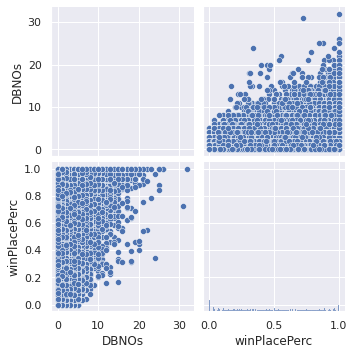

In [ ]:
sns.set()
cols = ['DBNOs', 'winPlacePerc']
sns.pairplot(train_match[cols], size=2.5)
plt.show()

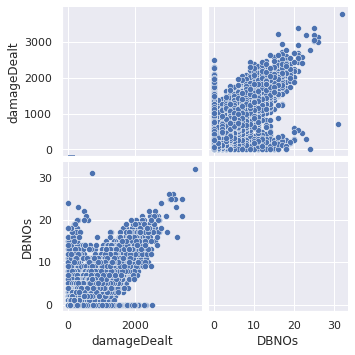

In [ ]:
sns.set()
cols = ['damageDealt', 'DBNOs']
sns.pairplot(train_match[cols], size=2.5)
plt.show()

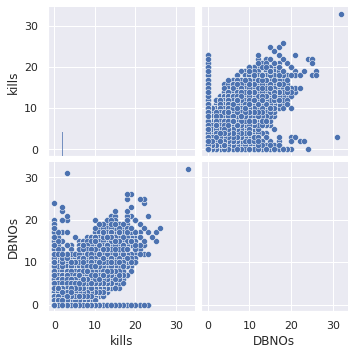

In [ ]:
sns.set()
cols = ['kills', 'DBNOs']
sns.pairplot(train_match[cols], size=2.5)
plt.show()
# damagedealt와 kills 컬럼을 합치는 방식을 생각해보거나 둘 중에 하나만 사용하면 좋을 듯

###headshotKills

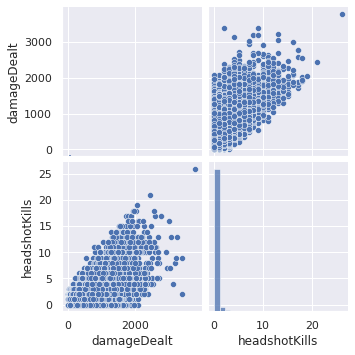

In [ ]:
sns.set()
cols=['damageDealt', 'headshotKills']
sns.pairplot(train_match[cols], size = 2.5)
plt.show()

In [ ]:
d=train_match.loc[(train_match['headshotKills']!=0) & (train_match['damageDealt']==0)]
e=d[d['damageDealt']==0].index
train_match.drop(e,axis=0,inplace=True)
# 헤드샷킬이 있는데 데미지가 0인 데이터가 936개 존재
# 제거해는 것 고려

###killPlace

###killPoints

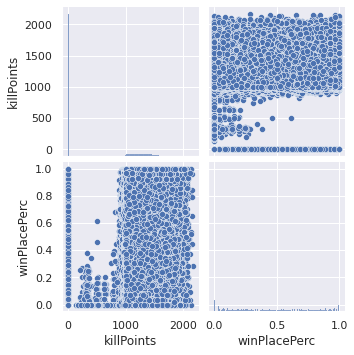

In [ ]:
sns.set()
cols = ['killPoints', 'winPlacePerc']
sns.pairplot(train_match[cols], size=2.5)
plt.show()
# 상관관계가 많이 떨어져 보임
# 비슷한 killpoints, winpoints, rankpoints를 가진 사람들끼리 매칭이 잡히는 듯함
# 세개 칼럼 제거해도 좋아보임.

###kills

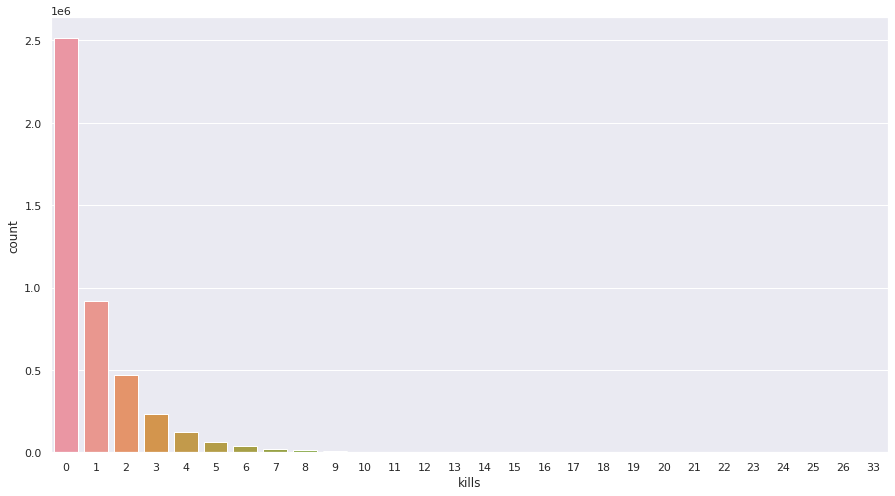

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(train_match['kills'])
plt.show()

In [ ]:
d = train_match[(train_match['kills']!=0) & (train_match['damageDealt']==0)]
e = d[d['damageDealt']==0].index
train_match.drop(e, axis=0, inplace=True)
# kill 기록이 있으나 damage가 0인 데이터 개수 3116 삭제

In [ ]:
train_match.loc[(train_match['kills']==0), 'kills'] = 0
train_match.loc[(train_match['kills']<=3) & (train_match['kills']>=1), 'kills'] = 1
train_match.loc[(train_match['kills']<=6) & (train_match['kills']>=4), 'kills'] = 2
train_match.loc[(train_match['kills']<=9) & (train_match['kills']>=7), 'kills'] = 3
train_match.loc[(train_match['kills']>=10), 'kills'] = 4 

In [ ]:
test_match.loc[(test_match['kills']==0), 'kills'] = 0
test_match.loc[(test_match['kills']<=3) & (test_match['kills']>=1), 'kills'] = 1
test_match.loc[(test_match['kills']<=6) & (test_match['kills']>=4), 'kills'] = 2
test_match.loc[(test_match['kills']<=9) & (test_match['kills']>=7), 'kills'] = 3
test_match.loc[(test_match['kills']>=10), 'kills'] = 4 

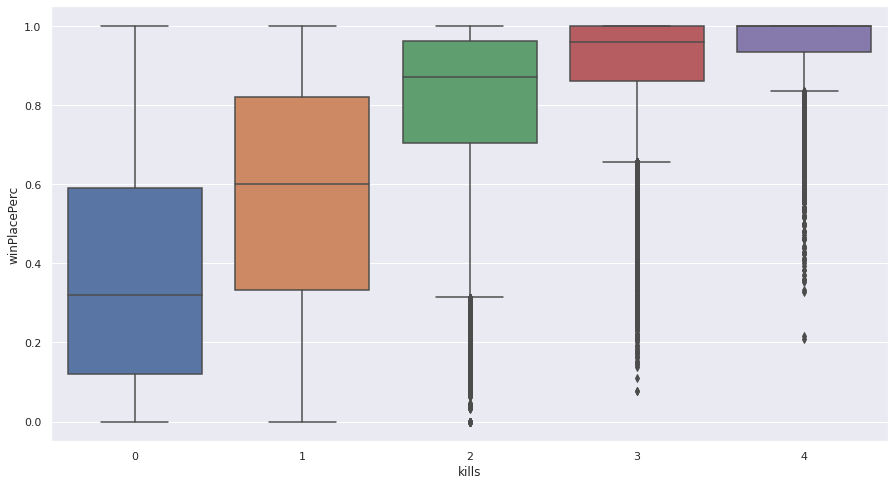

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(x='kills', y='winPlacePerc', data = train_match)
plt.show()

###longestKill

### rideDistance

### walkDistance

###swimDistance

###roadKills

### teamKills

###vehicleDestroys

###weaponsAcquired

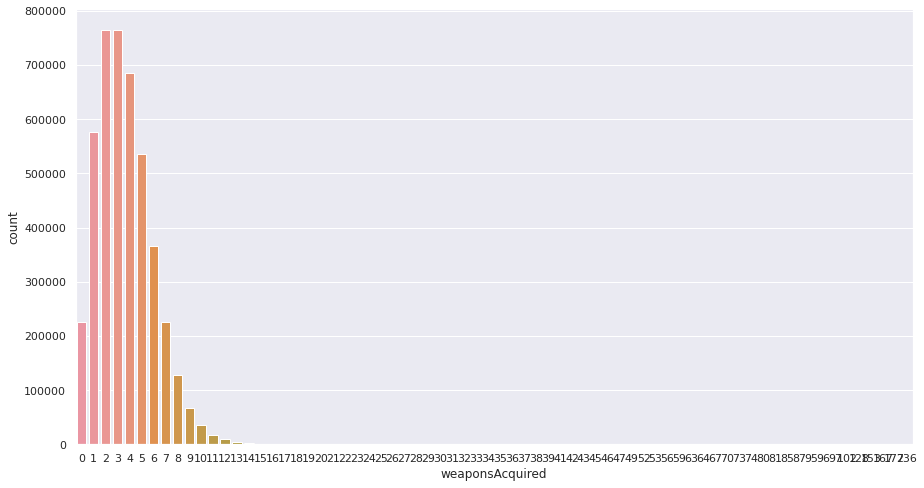

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(train_match['weaponsAcquired'])
plt.show()

In [ ]:
train_match.loc[(train_match['weaponsAcquired']==0), 'weaponsAcquired'] = 0
train_match.loc[(train_match['weaponsAcquired']<=2) & (train_match['weaponsAcquired']>=1), 'weaponsAcquired'] = 1
train_match.loc[(train_match['weaponsAcquired']<=4) & (train_match['weaponsAcquired']>=3), 'weaponsAcquired'] = 2
train_match.loc[(train_match['weaponsAcquired']<=6) & (train_match['weaponsAcquired']>=5), 'weaponsAcquired'] = 3
train_match.loc[(train_match['weaponsAcquired']>=7), 'weaponsAcquired'] = 4 

In [ ]:
test_match.loc[(test_match['weaponsAcquired']==0), 'weaponsAcquired'] = 0
test_match.loc[(test_match['weaponsAcquired']<=2) & (test_match['weaponsAcquired']>=1), 'weaponsAcquired'] = 1
test_match.loc[(test_match['weaponsAcquired']<=4) & (test_match['weaponsAcquired']>=3), 'weaponsAcquired'] = 2
test_match.loc[(test_match['weaponsAcquired']<=6) & (test_match['weaponsAcquired']>=5), 'weaponsAcquired'] = 3
test_match.loc[(test_match['weaponsAcquired']>=7), 'weaponsAcquired'] = 4 

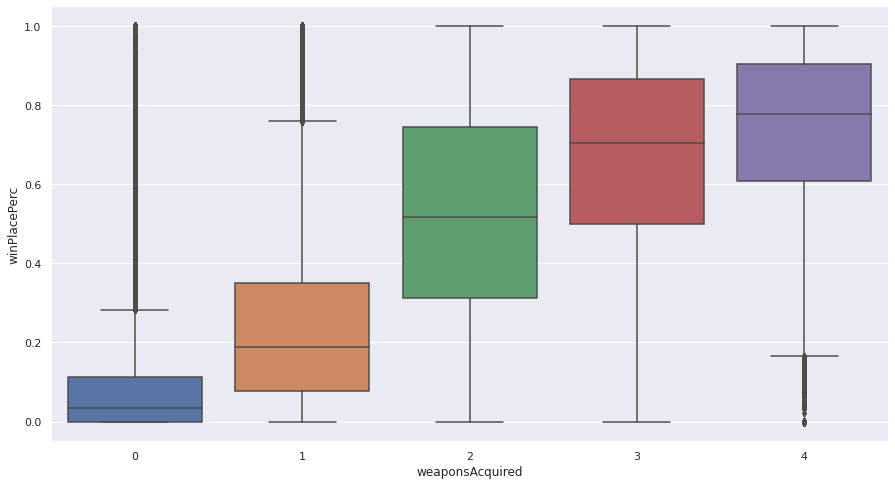

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(x='weaponsAcquired', y='winPlacePerc', data = train_match)
plt.show()

### winPoints

In [ ]:
train_match
#Id, groupId,matchId,killPlace, killPoints,matchDuration, maxPlace, numGroups,rankPoints, revive,roadKills, teamKills,vehicleDistroys, winPoints

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00000,0,0,0,60,...,0,0.000000,0,0.000000,0,0,244.7500,1,1466,0.444336
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.50000,0,0,0,57,...,0,0.004501,0,11.039062,0,0,1434.0000,3,0,0.640137
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00000,0,0,0,47,...,0,0.000000,0,0.000000,0,0,161.7500,1,0,0.775391
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90625,0,0,0,75,...,0,0.000000,0,0.000000,0,0,202.7500,2,0,0.166748
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00000,0,0,0,45,...,0,0.000000,0,0.000000,0,0,49.7500,1,0,0.187500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.00000,0,0,0,74,...,0,1292.000000,0,0.000000,0,0,1019.0000,2,1507,0.178589
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.15625,0,0,0,69,...,0,0.000000,0,0.000000,0,0,81.6875,3,0,0.293457
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06250,0,0,0,66,...,0,0.000000,0,2.183594,0,0,788.5000,2,0,0.481445
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,2,180.37500,1,1,1,11,...,2,0.000000,0,0.000000,0,0,2748.0000,4,0,0.799805


### 모델링


In [ ]:
tr_scale = pd.concat([train_match, train_match_f], axis = 0)
ts_scale = pd.concat([test_match, test_match_f], axis = 0)

In [ ]:
tr_scale.drop(['Id', 'groupId', 'matchId', 'killPlace', 'killPoints', 'matchDuration', 'maxPlace', 'numGroups', 'rankPoints', 'revives', 'roadKills', 'teamKills', 'vehicleDestroys', 'winPoints'], axis = 1, inplace = True)
ts_scale.drop(['Id', 'groupId', 'matchId', 'killPlace', 'killPoints', 'matchDuration', 'maxPlace', 'numGroups', 'rankPoints', 'revives', 'roadKills', 'teamKills', 'vehicleDestroys', 'winPoints'], axis = 1, inplace = True)

In [ ]:
tr_scale

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,kills,killStreaks,longestKill,matchType,rideDistance,swimDistance,walkDistance,weaponsAcquired,winPlacePerc
0,0,0,0.00000,0,0,0,0,0,0.00000,3,0.000000,0.000000,244.75,1,0.444336
1,0,0,91.50000,0,0,0,0,0,0.00000,3,0.004501,11.039062,1434.00,3,0.640137
2,1,0,68.00000,0,0,0,0,0,0.00000,2,0.000000,0.000000,161.75,1,0.775391
3,0,0,32.90625,0,0,0,0,0,0.00000,3,0.000000,0.000000,202.75,2,0.166748
4,0,0,100.00000,0,0,0,1,1,58.53125,1,0.000000,0.000000,49.75,1,0.187500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446353,1,4,1300.00000,0,5,5,16,3,109.87500,4,0.000000,0.000000,186.25,13,1.000000
4446375,1,0,396.00000,3,0,3,2,1,77.12500,4,0.000000,0.000000,225.75,17,0.600098
4446682,0,0,41.93750,0,0,0,1,1,43.37500,4,0.000000,0.000000,0.00,4,0.943359
4446749,0,5,0.00000,0,0,5,0,0,0.00000,4,2024.000000,0.000000,2398.00,4,0.416748


In [ ]:
## minMax 적용허기
from sklearn.preprocessing import MinMaxScaler
tr_scale_dropwin = tr_scale.drop(['winPlacePerc', 'assists', 'boosts', 'DBNOs', 'headshotKills', 'heals', 'kills', 'killStreaks', 'matchType', 'weaponsAcquired'], axis = 1)
scaler = MinMaxScaler()
scaler.fit(tr_scale_dropwin)
df_tr_scale = scaler.transform(tr_scale_dropwin)
df_tr_scale = pd.DataFrame(data = df_tr_scale, columns= tr_scale_dropwin.columns)

In [ ]:
df_tr_scale

,damageDealt,longestKill,rideDistance,swimDistance,walkDistance
0,0.000000,0.000000,0.000000e+00,0.000000,0.009499
1,0.013832,0.000000,1.192093e-07,0.002888,0.055634
2,0.010277,0.000000,0.000000e+00,0.000000,0.006275
3,0.004974,0.000000,0.000000e+00,0.000000,0.007866
4,0.015114,0.053497,0.000000e+00,0.000000,0.001930
...,...,...,...,...,...
4442908,0.196533,0.100464,0.000000e+00,0.000000,0.007229
4442909,0.059845,0.070496,0.000000e+00,0.000000,0.008759
4442910,0.006340,0.039642,0.000000e+00,0.000000,0.000000
4442911,0.000000,0.000000,4.971313e-02,0.000000,0.093079


In [ ]:
scaler = MinMaxScaler()
ts_scale_dropwin = ts_scale.drop(['assists', 'boosts', 'DBNOs', 'headshotKills', 'heals', 'kills', 'killStreaks', 'matchType', 'weaponsAcquired'], axis = 1)
scaler.fit(ts_scale_dropwin)
df_ts_scale = scaler.transform(ts_scale_dropwin)
df_ts_scale = pd.DataFrame(data = df_ts_scale, columns = ts_scale_dropwin.columns)

In [ ]:
tr_scale_ds = tr_scale.drop(['damageDealt', 'longestKill', 'rideDistance', 'swimDistance', 'walkDistance'], axis=1)
ts_scale_ds = ts_scale.drop(['damageDealt', 'longestKill', 'rideDistance', 'swimDistance', 'walkDistance'], axis=1)

In [ ]:
df_tr_scale_ds = pd.DataFrame(data = tr_scale_ds)

In [ ]:
tr_scale_ds
ts_scale_ds

,assists,boosts,DBNOs,headshotKills,heals,kills,killStreaks,matchType,weaponsAcquired
0,0,0,0,0,0,0,0,3,1
1,0,2,0,0,1,1,1,2,3
2,1,0,0,0,2,0,0,3,2
3,0,0,0,0,0,0,0,2,2
4,0,2,1,2,1,1,1,3,2
...,...,...,...,...,...,...,...,...,...
1934169,0,0,0,0,0,1,1,4,11
1934170,0,0,0,0,0,0,0,4,1
1934171,0,2,0,0,0,0,0,4,5
1934172,0,0,0,0,0,0,0,4,2


In [ ]:
tr_scale_ds = tr_scale_ds.reset_index(drop=True)
ts_scale_ds = ts_scale_ds.reset_index(drop=True)

In [ ]:
df_tr_scale_a
df_ts_scale_a

,damageDealt,longestKill,rideDistance,swimDistance,walkDistance,assists,boosts,DBNOs,headshotKills,heals,kills,killStreaks,matchType,weaponsAcquired
0,0.008263,0.000000,0.000000,0.0,0.039429,0,0,0,0,0,0,0,3,1
1,0.028763,0.360352,0.114624,0.0,0.135254,0,2,0,0,1,1,1,2,3
2,0.003759,0.000000,0.000000,0.0,0.052826,1,0,0,0,2,0,0,3,2
3,0.010521,0.000000,0.000000,0.0,0.121521,0,0,0,0,0,0,0,2,2
4,0.053040,0.059814,0.000000,0.0,0.198730,0,2,1,2,1,1,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1934169,0.032104,0.000000,0.000000,0.0,0.061920,0,0,0,0,0,1,1,4,11
1934170,0.000000,0.000000,0.069275,0.0,0.016251,0,0,0,0,0,0,0,4,1
1934171,0.006535,0.000000,0.142212,0.0,0.224243,0,2,0,0,0,0,0,4,5
1934172,0.000000,0.000000,0.000000,0.0,0.004856,0,0,0,0,0,0,0,4,2


In [ ]:
df_tr_scale_a = pd.concat([df_tr_scale, tr_scale_ds], axis = 1)
df_ts_scale_a = pd.concat([df_ts_scale, ts_scale_ds], axis = 1)

In [ ]:
a = ['winPlacePerc', 'assists', 'boosts', 'DBNOs', 'headshotKills', 'heals', 'kills', 'killStreaks', 'matchType', 'weaponsAcquired']

for b in a:
    df_tr_scale[b] = tr_scale[b]
    # for 문으로는 어찌 할 수 있을까

SyntaxError: ignored

# 3번째 EDA

In [ ]:
df_train

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00000,0,0,0,60,1241,0,0,0.00000,1306,squad-fpp,28,26,-1,0,0.000000,0,0.000000,0,0,244.7500,1,1466,0.444336
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.50000,0,0,0,57,0,0,0,0.00000,1777,squad-fpp,26,25,1484,0,0.004501,0,11.039062,0,0,1434.0000,5,0,0.640137
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00000,0,0,0,47,0,0,0,0.00000,1318,duo,50,47,1491,0,0.000000,0,0.000000,0,0,161.7500,2,0,0.775391
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90625,0,0,0,75,0,0,0,0.00000,1436,squad-fpp,31,30,1408,0,0.000000,0,0.000000,0,0,202.7500,3,0,0.166748
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00000,0,0,0,45,0,1,1,58.53125,1424,solo-fpp,97,95,1560,0,0.000000,0,0.000000,0,0,49.7500,2,0,0.187500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.00000,0,0,0,74,1029,0,0,0.00000,1873,squad-fpp,29,28,-1,0,1292.000000,0,0.000000,0,0,1019.0000,3,1507,0.178589
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.15625,0,0,0,69,0,0,0,0.00000,1435,solo,93,93,1501,0,0.000000,0,0.000000,0,0,81.6875,6,0,0.293457
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06250,0,0,0,66,0,0,0,0.00000,1321,squad-fpp,28,28,1500,0,0.000000,0,2.183594,0,0,788.5000,4,0,0.481445
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,4,180.37500,1,1,2,11,0,2,1,98.50000,1373,squad-fpp,26,25,1418,2,0.000000,0,0.000000,0,0,2748.0000,8,0,0.799805


In [ ]:
# group화 max : longestKill, walkDistance
#         mean : assists, boosts, damageDealt, DBNOs, headshotKills, heals, kills, killStreaks, revives, teamKills
df_groupId = df_train.groupby('groupId')['assists', 'killStreaks','walkDistance'].mean()
df_groupId['winPlacePerc'] = df_train.groupby('groupId')['winPlacePerc'].mean().values

In [ ]:
df_groupId

,kills,killStreaks,winPlacePerc
groupId,,,
00000c08b5be36,0.666667,0.666667,0.199951
00000d1cbbc340,1.000000,1.000000,0.115417
000025a09dd1d7,0.000000,0.000000,0.199951
000038ec4dff53,2.000000,1.000000,0.961426
00003a54230763,0.500000,0.500000,0.139526
...,...,...,...
ffffedb6ecff6a,0.000000,0.000000,0.036987
fffff305a0133d,2.000000,1.500000,0.851074
fffff32bc7eab9,3.000000,2.000000,0.250000


## 1. Min-Max scaling 적용한 모델링

In [ ]:
# 이 데이터 사용
df_tr_scale_a
df_ts_scale_a

In [ ]:
X_train = df_tr_scale_a.drop('winPlacePerc', axis = 1).values
target_label = df_tr_scale_a['winPlacePerc'].values
X_test = df_ts_scale_a.values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, target_label ,train_size=0.8,test_size=0.2,random_state=0)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid', font_scale=1.4)
from imblearn.over_sampling import SMOTE
import itertools
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import time

# Sklearn
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score
from sklearn.metrics import roc_auc_score, plot_confusion_matrix, plot_roc_curve, roc_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.feature_selection import mutual_info_classif
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer


# Models
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from sklearn.naive_bayes import GaussianNB

In [ ]:
#importing all the required ML packages
from sklearn.ensemble import RandomForestRegressor # 유명한 randomforestRegressor 입니다. 
from sklearn import metrics # 모델의 평가를 위해서 씁니다
from sklearn.model_selection import train_test_split # traning set을 쉽게 나눠주는 함수입니다.

In [ ]:
df_tr_scale_a['matchType']=df_tr_scale_a['matchType'].astype(int)
df_ts_scale_a['matchType']=df_ts_scale_a['matchType'].astype(int)

In [ ]:
df_tr_scale_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4442913 entries, 0 to 4442912
Data columns (total 15 columns):
 #   Column           Dtype  
---  ------           -----  
 0   damageDealt      float16
 1   longestKill      float16
 2   rideDistance     float16
 3   swimDistance     float16
 4   walkDistance     float16
 5   assists          int8   
 6   boosts           int8   
 7   DBNOs            int8   
 8   headshotKills    int8   
 9   heals            int8   
 10  kills            int8   
 11  killStreaks      int8   
 12  matchType        int64  
 13  weaponsAcquired  int16  
 14  winPlacePerc     float16
dtypes: float16(6), int16(1), int64(1), int8(7)
memory usage: 122.9 MB


In [ ]:
df_ts_scale_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1934174 entries, 0 to 1934173
Data columns (total 14 columns):
 #   Column           Dtype  
---  ------           -----  
 0   damageDealt      float16
 1   longestKill      float16
 2   rideDistance     float16
 3   swimDistance     float16
 4   walkDistance     float16
 5   assists          int8   
 6   boosts           int8   
 7   DBNOs            int8   
 8   headshotKills    int8   
 9   heals            int8   
 10  kills            int8   
 11  killStreaks      int8   
 12  matchType        int64  
 13  weaponsAcquired  int16  
dtypes: float16(5), int16(1), int64(1), int8(7)
memory usage: 49.8 MB


In [ ]:
df_tr_scale_a

,damageDealt,longestKill,rideDistance,swimDistance,walkDistance,assists,boosts,DBNOs,headshotKills,heals,kills,killStreaks,matchType,weaponsAcquired,winPlacePerc
0,0.000000,0.000000,0.000000e+00,0.000000,0.009499,0,0,0,0,0,0,0,3,1,0.444336
1,0.013832,0.000000,1.192093e-07,0.002888,0.055634,0,0,0,0,0,0,0,3,3,0.640137
2,0.010277,0.000000,0.000000e+00,0.000000,0.006275,1,0,0,0,0,0,0,2,1,0.775391
3,0.004974,0.000000,0.000000e+00,0.000000,0.007866,0,0,0,0,0,0,0,3,2,0.166748
4,0.015114,0.053497,0.000000e+00,0.000000,0.001930,0,0,0,0,0,1,1,1,1,0.187500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4442908,0.196533,0.100464,0.000000e+00,0.000000,0.007229,1,4,0,5,5,16,3,4,13,1.000000
4442909,0.059845,0.070496,0.000000e+00,0.000000,0.008759,1,0,3,0,3,2,1,4,17,0.600098
4442910,0.006340,0.039642,0.000000e+00,0.000000,0.000000,0,0,0,0,0,1,1,4,4,0.943359
4442911,0.000000,0.000000,4.971313e-02,0.000000,0.093079,0,5,0,0,5,0,0,4,4,0.416748


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# X = df_tr_scale_a
# y = df_tr_scale_a['winPlacePerc']

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state =1)

### LGBRegressor

In [ ]:
from lightgbm import LGBMRegressor

In [ ]:
model_reg_lig = LGBMRegressor

In [ ]:
model_reg_lig = LGBMRegressor()
model_reg_lig.fit(X_train, y_train)

LGBMRegressor()

In [ ]:
# 1차 0.09, 2차 0.0005

pred = model_reg_lig.predict(X_valid)
print('MSE :',mean_absolute_error(y_valid, pred))
print('RMSE :',sqrt(mean_squared_error(y_valid, pred)))
print('MAE :',mean_absolute_error(y_valid, pred))

MSE : 0.09948325341794144
RMSE : 0.13600508187858418
MAE : 0.09948325341794144


### XGBRegressor

In [ ]:
from xgboost import XGBRegressor

In [ ]:
model_reg = XGBRegressor()
model_reg.fit(X_train, y_train)

[05:33:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_error
from math import sqrt

In [ ]:
# predict 를 수행하고 mean_absolute_error, rmse 결과 출력
# 1차 0.09 2차 0.001
pred = model_reg.predict(X_valid)
print('MSE :',mean_absolute_error(y_valid, pred))
print('RMSE :',sqrt(mean_squared_error(y_valid, pred)))
print('MAE :',mean_absolute_error(y_valid, pred))

MSE : 0.10057246
RMSE : 0.13711868781607353
MAE : 0.10057246
